In [1]:
from tqdm import tqdm 
from xml.etree import ElementTree as ET
from datetime import datetime
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

## Graph

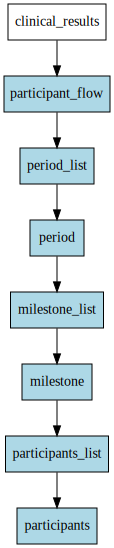

In [10]:
from graphviz import Digraph
from IPython.display import display
import random
def create_hierarchy_graph(dot, egdes, feature_name, created_nodes):
    # 定义不同层级的颜色
    level_colors = {
        1: 'lightblue',
        2: 'lightgreen',
        3: 'yellow',
        4: 'orange',
        5: 'red',
        6: 'peachpuff',
        7: 'pink',
        8: 'grey',
        9: 'cyan',  # 可以根据实际层级数量调整或添加更多颜色
        10: 'hotpink',
        11: 'ivory',
        12: 'blue',
        13: 'lawngreen',
        14: 'lavender',
        15: 'khaki',
        16: 'olivedrab1',
        17: 'paleturquoise',
        18: 'papayawhip',
        19: 'purple',
    }
    nodes = feature_name.split('/')
    node_paths = []  # 用于存储每个节点的唯一路径标识符
    node_count = {}  # 用于计数并生成唯一ID

    for i in range(len(nodes)):
        if i == 0:
            node_paths.append(nodes[i])
            dot.node(nodes[i], label=nodes[i], shape='rect')
        else:
            unique_id = f"{'/'.join(nodes[:i])}/{nodes[i]}"
            # unique_id = f"{nodes[i-1]}/{nodes[i]}"
            if len(nodes[:i]) > 1:
                color = all_color
                # print(color)
            elif len(nodes[:i]) == 1:
                if unique_id in created_nodes.keys():
                    color = created_nodes[unique_id]['color']
                    all_color = color
                else:
                    # color = level_colors.get(i + 1, 'white')
                    if 'condition' in nodes[i]:
                        color = 'teal'
                        created_nodes[unique_id] = {'color': color}
                        all_color = color
                    elif 'disposition_first' in nodes[i]:
                        color = 'tomato'
                        created_nodes[unique_id] = {'color': color}
                        all_color = color
                    elif 'enrollment' in nodes[i]:
                        color = 'gold'
                        created_nodes[unique_id] = {'color': color}
                        all_color = color
                    elif 'expanded_access' in nodes[i]:
                        color = 'lightskyblue'
                        created_nodes[unique_id] = {'color': color}
                        all_color = color
                    elif 'intervention' in nodes[i]:
                        color = 'lightcoral'
                        created_nodes[unique_id] = {'color': color}
                        all_color = color
                    else:
                        color = level_colors.get((len(created_nodes) + 1) % len(level_colors), 'white')
                        created_nodes[unique_id] = {'color': color}
                        all_color = color

            node_paths.append(unique_id)
            dot.node(unique_id, label=nodes[i], shape='rect', style='filled', fillcolor=color)
            edge = (node_paths[i-1], node_paths[i])
            if edge not in edges:
                edges.append(edge)
                dot.edge(*edge)

            

    
edges = []
dot = Digraph(comment='Hierarchy Graph')
feature_name = 'clinical_results/participant_flow/period_list/period/milestone_list/milestone/participants_list/participants'
create_hierarchy_graph(dot, edges, feature_name, created_nodes={})
display(dot)

In [ ]:
feature_info = pd.read_csv('feature-select.csv')
dot = Digraph(comment='Feature Hierarchy')
dot.attr(rankdir='LR')
edges = []
created_nodes = {}
feature_names = sorted(feature_info['feature_name'].to_list())
for name in feature_names:
    name = 'Clinical Trial/' + name 
    print(name, len(created_nodes))
    if 'textblock' in name:
        name = name.replace('\textblock', '')
    create_hierarchy_graph(dot, edges, name, created_nodes)
    
dot.render('feature_hierarchy_color', format='pdf', cleanup=True)
display(dot)


## feature-select

In [60]:
feature_info = pd.read_csv('feature-select.csv').set_index('feature_name')
feature_info

,备注,Number,Percent,Sample1,Sample2,Sample3,Sample4,trial failure reason prediction**,trial eligibility criteria design**,trial duration prediction,trial approval prediction,trial failure reason prediction,trial recruitment prediction,trial eligibility criteria design,drug dose prediction (?),drug repurposing,Adverse Event Prediction（可能包括不良事件的类型，受伤和死亡人数）,Patient Amount Time-Series Forecasting（就是病人的数量会有变化的，一开始可能纳入一些人，后来可能就跑路或者死亡了）
feature_name,,,,,,,,,,,,,,,,,,
id_info/org_study_id,NaN,483179,0.999876,NCRR-M01RR01070-0506,NCRR-M01RR00400-0587,2002LS032,NCRR-M01RR03186-9943,N,？,？,？,？,？,？,？,？,？,？
id_info/secondary_id,NaN,97797,0.202378,M01RR001070,M01RR000400,MT1999-06,M01RR003186,N,？,？,？,？,？,？,？,？,？,？
id_info/nct_id,索引ID,483239,1.000000,NCT00000102,NCT00000104,NCT00000105,NCT00000106,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
brief_title,NaN,483239,1.000000,Congenital Adrenal Hyperplasia: Calcium Channe...,Does Lead Burden Alter Neuropsychological Deve...,Vaccination With Tetanus and KLH to Assess Imm...,41.8 Degree Centigrade Whole Body Hyperthermia...,Y,Y,Y,Y,Y,Y,Y,N,N,N,N
sponsors/lead_sponsor/agency,NaN,483239,1.000000,National Center for Research Resources (NCRR),National Center for Research Resources (NCRR),"Masonic Cancer Center, University of Minnesota",National Center for Research Resources (NCRR),N,N,？,？,？,？,？,？,？,？,？
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units,NaN,107,0.000221,"['Participants', 'community', 'Participants', ...","['Participants', 'limbs', 'Participants', 'lim...","['Participants', 'warts', 'Participants', 'war...","['Participants', 'ICUs', 'Participants', 'ICUs...",N,N,N,N,N,N,N,N,N,N,N
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope,NaN,107,0.000221,"['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...","['Measure', 'Measure', 'Measure', 'Measure', '...",N,N,N,N,N,N,N,N,N,N,N
clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id},NaN,107,0.000221,"['B1', 'B2', 'B3', 'B4', 'B5', 'B1', 'B2', 'B3...","['B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1', 'B1']","['B1', 'B2', 'B3', 'B1', 'B2', 'B3', 'B1', 'B2...","['B1', 'B2', 'B3', 'B1', 'B2', 'B3', 'B1', 'B2...",N,N,N,N,N,N,N,N,N,N,N


In [4]:
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'../../preprocess_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    # print(len(All_data[i].columns))
    
All_Ori = pd.concat(All_data)

## 以adverse-event的为基础，处理特征

In [61]:
handmake = pd.read_csv('adverse-event-rate-prediction/mortality_rate_MI_handmake.csv',index_col=0)
handmake = handmake[handmake['____/__'] == 'Y']
selected_feature = list(handmake.index)
selected_feature

['phase',
 'study_type',
 'has_expanded_access',
 'study_design_info/intervention_model',
 'study_design_info/primary_purpose',
 'eligibility/gender',
 'eligibility/healthy_volunteers',
 'oversight_info/has_dmc',
 'study_design_info/allocation',
 'patient_data/sharing_ipd',
 'oversight_info/is_fda_regulated_drug',
 'oversight_info/is_fda_regulated_device',
 'eligibility/minimum_age',
 'eligibility/maximum_age',
 'number_of_arms',
 'id_info/nct_id',
 'brief_title',
 'brief_summary/textblock',
 'study_design_info/masking',
 'condition',
 'intervention/intervention_type',
 'intervention/intervention_name',
 'eligibility/criteria/textblock',
 'location/facility/address/city',
 'condition_browse/mesh_term',
 'intervention_browse/mesh_term',
 'icdcode',
 'keyword',
 'enrollment',
 'arm_group/arm_group_type']

In [62]:
selected_feature.extend(['eligibility/sampling_method', 'patient_data/ipd_info_type', 'sponsors/lead_sponsor/agency_class', 'completion_date{type}', 'start_date{type}', 'enrollment{type}',
                         'responsible_party/responsible_party_type', 'study_design_info/observational_model', 'study_design_info/time_perspective', 'biospec_retention', 
                        #  'clinical_results/baseline/measure_list/measure/dispersion', 'clinical_results/baseline/measure_list/measure/param', 
                        #  'clinical_results/reported_events/serious_events/category_list/category/event_list/event/assessment',
                        #  'clinical_results/outcome_list/outcome/analysis_list/analysis/dispersion_type',
                        #  'clinical_results/outcome_list/outcome/analysis_list/analysis/non_inferiority_type'
                         ])
print(len(selected_feature))

40


In [63]:
text_feature = ['brief_title', 'brief_summary', 'detailed_description', 'eligibility/criteria/textblock','eligibility/study_pop/textblock', 'intervention/description',
'keyword', 'study_design_info/intervention_model_description', 'study_design_info/masking_description']
# condition -> condition_browse/mesh_term -> embedding 
# intervention/intervention_name -> intervention_browse/mesh_term -> embedding 同时也就不需要smiless了
category_feature = ['eligibility/gender', 'eligibility/healthy_volunteers', 'eligibility/sampling_method', 'has_expanded_access', 'oversight_info/has_dmc',
'oversight_info/is_fda_regulated_device', 'oversight_info/is_fda_regulated_drug', 'patient_data/sharing_ipd', 'phase', 'responsible_party/responsible_party_type',
'sponsors/lead_sponsor/agency_class', 'study_design_info/allocation', 'study_design_info/intervention_model', 'study_design_info/masking_num',
'study_design_info/observational_model', 'study_design_info/primary_purpose', 'study_design_info/time_perspective', 'study_type'] # "MaskingType-*"(0/1) + ipd_info_type-*(0/1)
continue_feature = ['eligibility/minimum_age', 'eligibility/maximum_age', 'enrollment', 'number_of_arms'] # "*arm number", "intervention number"

In [20]:
All = All_Ori[selected_feature]

In [3]:
raw_data = pd.read_csv('raw_data.csv', index_col=0)
raw_data

,status,why_stop,label,phase,diseases,icdcodes,drugs,smiless,criteria,complete_year,start_year
nctid,,,,,,,,,,,
NCT00000102,completed,NaN,-1,phase 1/phase 2,['congenital adrenal hyperplasia'],"[""['N25.0', 'Q61.4', 'N23', 'N26.9', 'P96.0', ...",['nifedipine'],['COC(=O)C1=C(C)NC(C)=C(C1C1=CC=CC=C1[N+]([O-]...,\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000110,completed,NaN,-1,NaN,['obesity'],"[""['E66.8', 'E66.9', 'E66.1', 'O99.214', 'O99....",['dietary fat'],[],\n Inclusion Criteria:\r\n\r\n ...,NaN,NaN
NCT00000114,completed,NaN,-1,phase 3,['retinitis pigmentosa'],[],"['vitamin e', 'vitamin a']",['CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2...,\n Men and nonpregnant women between ag...,1987.0,1984.0
NCT00000115,completed,NaN,-1,phase 2,"['macular edema, cystoid']",[],['acetazolamide'],['CC(=O)NC1=NN=C(S1)S(N)(=O)=O'],\n Males and females 8 years of age or ...,1994.0,1990.0
NCT00000117,completed,NaN,-1,phase 3,['optic neuritis'],"[""['H46.8', 'H46.9']""]",['immunoglobulin'],[],"\n To be eligible, patients must have a...",1997.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...
NCT06263959,recruiting,NaN,-1,phase 2,['chronic hepatitis b'],"[""['B18.0', 'B18.1', 'B18.2', 'B18.8', 'B18.9']""]","['gst-hg131', 'placebo to match gst-hg131']",[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2023.0
NCT06263998,not yet recruiting,NaN,-1,phase 1,['xerophthalmia'],[],"['ncp112', 'ncp112 placebo']",[],\n Inclusion Criteria:\r\n\r\n ...,2025.0,2024.0
NCT06264141,recruiting,NaN,-1,phase 2,['recurrent acute rhinosinusitis'],[],['nitric oxide releasing solution'],[],\n Inclusion Criteria:\r\n\r\n ...,2024.0,2024.0


In [4]:
All = pd.concat([All, raw_data['smiless']], axis=1)
All

NameError: name 'All' is not defined

In [21]:
print(All.columns)

Index(['phase', 'study_type', 'has_expanded_access',
       'study_design_info/intervention_model',
       'study_design_info/primary_purpose', 'eligibility/gender',
       'eligibility/healthy_volunteers', 'oversight_info/has_dmc',
       'study_design_info/allocation', 'patient_data/sharing_ipd',
       'oversight_info/is_fda_regulated_drug',
       'oversight_info/is_fda_regulated_device', 'eligibility/minimum_age',
       'eligibility/maximum_age', 'number_of_arms', 'id_info/nct_id',
       'brief_title', 'brief_summary/textblock', 'study_design_info/masking',
       'condition', 'intervention/intervention_type',
       'intervention/intervention_name', 'eligibility/criteria/textblock',
       'location/facility/address/city', 'condition_browse/mesh_term',
       'intervention_browse/mesh_term', 'icdcode', 'keyword', 'enrollment',
       'arm_group/arm_group_type', 'eligibility/sampling_method',
       'patient_data/ipd_info_type', 'sponsors/lead_sponsor/agency_class',
       'comp

## patient_data/ipd_info_type

In [22]:
All['patient_data/ipd_info_type'].value_counts()

patient_data/ipd_info_type
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)', 'Clinical Study Report (CSR)']                     2985
['Study Protocol', 'Statistical Analysis Plan (SAP)']                                                                                   2898
Study Protocol                                                                                                                          2799
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)']                                                    2709
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Informed Consent Form (ICF)', 'Clinical Study Report (CSR)', 'Analytic Code']    2374
['Study Protocol', 'Statistical Analysis Plan (SAP)', 'Clinical Study Report (CSR)']                                                    2089
['Study Protocol', 'Informed Consent Form (ICF)']                                                                              

In [23]:
value = All['patient_data/ipd_info_type']['NCT00805532']

def ipd_info_type_2Mulitlabel(value):
    if type(value) == list:
        counts = dict(Counter(value))
    elif type(value) == str and value[0] != '[':
        counts = {'ipd_info_type-' + value:1}
    elif type(value) == str and value[0] == '[':
        value = eval(value)
        counts = dict(Counter(value))
        # for key, value in counts.items():
        counts = {'ipd_info_type-' + key: value for key, value in counts.items()}
    else: 
        counts = {}
        
    return counts

print(All['patient_data/ipd_info_type']['NCT00805532'])
ipd_info_type_2Mulitlabel(value)

['Study Protocol', 'Informed Consent Form (ICF)', 'Clinical Study Report (CSR)', 'Analytic Code']


{'ipd_info_type-Study Protocol': 1,
 'ipd_info_type-Informed Consent Form (ICF)': 1,
 'ipd_info_type-Clinical Study Report (CSR)': 1,
 'ipd_info_type-Analytic Code': 1}

In [24]:
ipd_info_types = pd.DataFrame(All['patient_data/ipd_info_type'].apply(ipd_info_type_2Mulitlabel).tolist(), index=All.index)
ipd_info_types[All['patient_data/ipd_info_type'].notna()] = ipd_info_types[All['patient_data/ipd_info_type'].notna()].fillna(0).astype(int)
All = pd.merge(All, ipd_info_types, left_index=True, right_index=True)
for feature in All.columns:
    if 'ipd_info_type-' in feature:
        print(All[feature].value_counts())
# 卸磨杀驴
All = All.drop('patient_data/ipd_info_type', axis=1)

ipd_info_type-Statistical Analysis Plan (SAP)
1.0    14886
0.0     6224
Name: count, dtype: int64
ipd_info_type-Informed Consent Form (ICF)
1.0    10622
0.0    10488
Name: count, dtype: int64
ipd_info_type-Study Protocol
1.0    19676
0.0     1434
Name: count, dtype: int64
ipd_info_type-Clinical Study Report (CSR)
0.0    11494
1.0     9616
Name: count, dtype: int64
ipd_info_type-Analytic Code
0.0    16683
1.0     4427
Name: count, dtype: int64


### 将study_design_info/masking处理成Multi-hot和 masking num

In [25]:
All['study_design_info/masking'].value_counts()

study_design_info/masking
None (Open Label)                                                          204096
Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)     33975
Double (Participant, Investigator)                                          24732
Single (Outcomes Assessor)                                                  23295
Single (Participant)                                                        20871
Triple (Participant, Investigator, Outcomes Assessor)                       10395
Triple (Participant, Care Provider, Investigator)                           10328
Double (Participant, Outcomes Assessor)                                     10319
Double                                                                       6116
Single (Investigator)                                                        6083
Double (Investigator, Outcomes Assessor)                                     4810
Double (Participant, Care Provider)                                     

In [26]:
def get_masking_num(x):
    if pd.isnull(x):
        return None
    if 'Double' in x:
        return 2
    elif 'Single' in x:
        return 1
    elif 'Triple' in x:
        return 3
    elif 'Quadruple' in x:
        return 4
    else:
        return 0

All['study_design_info/masking_num'] = All['study_design_info/masking'].apply(get_masking_num)

In [27]:
All['study_design_info/masking_num'].value_counts()

study_design_info/masking_num
0.0    204096
1.0     52650
2.0     50652
4.0     33975
3.0     24598
Name: count, dtype: int64

In [28]:
def get_masking_multihot(x):
    # Indent the code block properly
    if pd.isnull(x):
        return [None, None, None, None]
    vector = [0, 0, 0, 0]
    if 'Participant' in x:
        vector[0] = 1
    if 'Care Provider' in x:
        vector[1] = 1
    if 'Investigator' in x:
        vector[2] = 1
    if 'Outcomes Assessor' in x:
        vector[3] = 1
    if get_masking_num(x) != 0 and sum(vector) == 0:
        return [None, None, None, None]
    assert sum(vector) == get_masking_num(x)
    return vector

# masking_multihot = pd.DataFrame(All['study_design_info/masking'].apply(get_masking_multihot).tolist(), index=All.index, columns = ['MaskingType-Participant', 'MaskingType-Care Provider', 'MaskingType-Investigator', 'MaskingType-Outcomes Assessor'])
# All = pd.merge(All, masking_multihot, right_index=True, left_index=True)
# print(len(All.columns))

In [29]:
masking_types = pd.DataFrame(All['study_design_info/masking'].apply(get_masking_multihot).tolist(), index=All.index, columns = ['MaskingType-Participant', 'MaskingType-Care Provider', 'MaskingType-Investigator', 'MaskingType-Outcomes Assessor'])
masking_types[All['study_design_info/masking'].notna()] = masking_types[All['study_design_info/masking'].notna()].fillna(0).astype(int)
All = pd.merge(All, masking_types, left_index=True, right_index=True)
print(len(All.columns))
for feature in All.columns:
    if 'MaskingType-' in feature:
        print(All[feature].value_counts())

49
MaskingType-Participant
0.0    248889
1.0    117082
Name: count, dtype: int64
MaskingType-Care Provider
0.0    311986
1.0     53985
Name: count, dtype: int64
MaskingType-Investigator
0.0    274340
1.0     91631
Name: count, dtype: int64
MaskingType-Outcomes Assessor
0.0    278522
1.0     87449
Name: count, dtype: int64


In [30]:
# 卸磨杀驴
All = All.drop('study_design_info/masking', axis=1)

### 将arm_group/arm_group_type处理成

Placebo Comparator Arm Number	

Experimental Arm Number	

No Intervention Arm Number	

Active Comparator Arm Number	

Other Arm Number	

Sham Comparator Arm Number

In [31]:
value = All['arm_group/arm_group_type']['NCT00001259']

def arm_group_type_2Mulitlabel(value):
    if type(value) == list:
        counts = dict(Counter(value))
    elif type(value) == str and value[0] != '[':
        counts = {value+' Arm Number':1}
    elif type(value) == str and value[0] == '[':
        value = eval(value)
        counts = dict(Counter(value))
        # for key, value in counts.items():
        counts = {key+' Arm Number':value for key, value in counts.items()}
    else: 
        counts = {}
        
    return counts

print(All['arm_group/arm_group_type'])
arm_group_type_2Mulitlabel(value)

NCT00000102                                                  NaN
NCT00000104                                                  NaN
NCT00000105                                                  NaN
NCT00000106                                                  NaN
NCT00000107                                                  NaN
                                     ...                        
NCT06264297                ['Active Comparator', 'Experimental']
NCT06264310    ['Placebo Comparator', 'Experimental', 'Experi...
NCT06264323                                                  NaN
NCT06264336                ['Experimental', 'Active Comparator']
NCT06264349    ['Experimental', 'Experimental', 'No Intervent...
Name: arm_group/arm_group_type, Length: 483239, dtype: object


{'Placebo Comparator Arm Number': 1, 'Experimental Arm Number': 6}

In [32]:
arm_group_types = pd.DataFrame(All['arm_group/arm_group_type'].apply(arm_group_type_2Mulitlabel).tolist(), index=All.index)
arm_group_types[All['arm_group/arm_group_type'].notna()] = arm_group_types[All['arm_group/arm_group_type'].notna()].fillna(0).astype(int)
All = pd.merge(All, arm_group_types, left_index=True, right_index=True)
print(len(All.columns))
for feature in All.columns:
    if 'Arm Number' in feature:
        print(All[feature].value_counts())

54
Experimental Arm Number
1.0     210793
0.0      64243
2.0      42772
3.0      15014
4.0       7145
5.0       2325
6.0       2127
7.0        738
8.0        696
9.0        375
10.0       280
12.0       176
11.0       136
16.0        72
14.0        70
15.0        69
13.0        69
17.0        29
18.0        26
32.0        19
20.0        16
24.0        11
19.0         9
22.0         8
23.0         6
21.0         4
25.0         4
26.0         3
28.0         2
30.0         2
43.0         1
44.0         1
40.0         1
38.0         1
37.0         1
27.0         1
29.0         1
34.0         1
33.0         1
Name: count, dtype: int64
Active Comparator Arm Number
0.0     224795
1.0      91488
2.0      23921
3.0       4832
4.0       1439
5.0        285
6.0        257
7.0         70
8.0         62
9.0         30
12.0        17
10.0        15
11.0         9
16.0         8
14.0         7
15.0         6
13.0         3
22.0         2
19.0         1
26.0         1
Name: count, dtype: int64
Placebo

In [33]:
# All = pd.merge(All, pd.DataFrame(All['arm_group/arm_group_type'].apply(arm_group_type_2Mulitlabel).tolist(), index=All.index), left_index=True, right_index=True)
# print(len(All.columns))
# # 卸磨杀驴
All = All.drop('arm_group/arm_group_type', axis=1)

### 将intervention/intervention_type处理成multi label

In [34]:
All['intervention/intervention_type'].value_counts()

intervention/intervention_type
Drug                                                                      61032
['Drug', 'Drug']                                                          57942
Other                                                                     42591
Device                                                                    32324
Behavioral                                                                23488
                                                                          ...  
['Procedure', 'Procedure', 'Procedure', 'Procedure', 'Drug', 'Device']        1
['Drug', 'Drug', 'Drug', 'Drug', 'Drug', 'Behavioral']                        1
['Procedure', 'Biological', 'Drug', 'Procedure']                              1
['Device', 'Behavioral', 'Other', 'Device']                                   1
['Device', 'Diagnostic Test', 'Device', 'Device']                             1
Name: count, Length: 6889, dtype: int64

In [35]:
def intervention_type_2Mulitlabel(value):
    if type(value) == list:
        counts = dict(Counter(value))
    elif type(value) == str and value[0] != '[':
        counts = {value+' intervention Number':1}
    elif type(value) == str and value[0] == '[':
        value = eval(value)
        counts = dict(Counter(value))
        # for key, value in counts.items():
        counts = {key+' intervention Number':value for key, value in counts.items()}
    else: 
        counts = {}
        
    return counts



In [36]:
intervention_types = pd.DataFrame(All['intervention/intervention_type'].apply(intervention_type_2Mulitlabel).tolist(), index=All.index)
intervention_types[All['intervention/intervention_type'].notna()] = intervention_types[All['intervention/intervention_type'].notna()].fillna(0).astype(int)
All = pd.merge(All, intervention_types, left_index=True, right_index=True)
print(len(All.columns))
for feature in All.columns:
    if 'intervention Number' in feature:
        print(All[feature].value_counts())

64
Drug intervention Number
0.0     253958
1.0      80229
2.0      65485
3.0      19016
4.0       8954
5.0       3244
6.0       1892
7.0        854
8.0        546
9.0        277
10.0       231
11.0       121
12.0       113
13.0        62
15.0        38
14.0        38
16.0        21
18.0        18
17.0        15
20.0        11
21.0         8
19.0         7
30.0         3
29.0         2
38.0         2
27.0         2
34.0         2
37.0         1
24.0         1
26.0         1
47.0         1
23.0         1
57.0         1
40.0         1
97.0         1
60.0         1
25.0         1
35.0         1
22.0         1
Name: count, dtype: int64
Procedure intervention Number
0.0     387581
1.0      29873
2.0      14038
3.0       2340
4.0        790
5.0        234
6.0        151
7.0         68
8.0         32
10.0        20
9.0         18
11.0         4
15.0         3
13.0         2
14.0         2
17.0         2
20.0         1
12.0         1
16.0         1
Name: count, dtype: int64
Biological intervent

In [37]:
# 卸磨杀驴
All = All.drop('intervention/intervention_type', axis=1)
print(All.columns)

Index(['phase', 'study_type', 'has_expanded_access',
       'study_design_info/intervention_model',
       'study_design_info/primary_purpose', 'eligibility/gender',
       'eligibility/healthy_volunteers', 'oversight_info/has_dmc',
       'study_design_info/allocation', 'patient_data/sharing_ipd',
       'oversight_info/is_fda_regulated_drug',
       'oversight_info/is_fda_regulated_device', 'eligibility/minimum_age',
       'eligibility/maximum_age', 'number_of_arms', 'id_info/nct_id',
       'brief_title', 'brief_summary/textblock', 'condition',
       'intervention/intervention_name', 'eligibility/criteria/textblock',
       'location/facility/address/city', 'condition_browse/mesh_term',
       'intervention_browse/mesh_term', 'icdcode', 'keyword', 'enrollment',
       'eligibility/sampling_method', 'sponsors/lead_sponsor/agency_class',
       'completion_date{type}', 'start_date{type}', 'enrollment{type}',
       'responsible_party/responsible_party_type',
       'study_design_inf

In [38]:
print(All.shape)

(483239, 63)


In [39]:
All.to_csv('All_data_prepared.csv')

duration 里enrollment两个全扔  四个全扔 enrollment type GDP+人口+老龄化程度

### city 转成GDP　population　aging　percent

In [40]:
import re

def remove_non_numeric(s):
    pattern = r'[^0-9.]'
    return re.sub(pattern, '', s)

def refine(x):
    # print(x)
    gdp, people, age = x.split(',')
    gdp = remove_non_numeric(gdp)
    people = remove_non_numeric(people)
    age = remove_non_numeric(age)
    if len(gdp) == 0:
        gdp = '0'
    if len(people) == 0:
        people = '0'
    if len(age) == 0:
        age = '0'
    return gdp, people, age

def map2value(x):
    x = re.sub(r"\s+", " ", x)
    if len(x.split(' ')) == 2:
        if len(x.split(' ')[-1].split(',')) == 3:
            return refine(x.split(' ')[-1])
        elif len(x.split(' ')[-1].split(',')) > 3:
            return refine(','.join(x.split(' ')[-1].split(',')[-3:]))
        elif len(x.split(' ')[-1].split(',')) < 3:
            return map2value(''.join(x.split(' ')))
    elif len(x.split(' ')) == 1:
        if len(x.split(',')) == 3 :
            return refine(x)
        elif len(x.split(',')) > 3:
            return refine(','.join(x.split(',')[-3:]))
        else:
            return refine(','.join(['0', x]))
    elif len(x.split(' ')) == 3:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis)
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')[-3:]))
    elif len(x.split(' ')) == 4:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis[1:])
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')))
    elif len(x.split(' ')) > 4:
        lis = x.split(' ')
        lis = list(filter(lambda a: a != '', lis))
        x = ' '.join(lis[1:])
        if len(x.split(',')) == 3 :
            # print(x.split(' '),''.join(x.split(' ')[-3:]))
            return map2value(''.join(x.split(' ')))
    else:
        print(len(x.split(' ')), x)
        

    


In [41]:
city_labels = pd.read_csv('city_labels_afternaafternaaaaaa.csv', index_col=0)
GDP = []
Population = []
Aging = []
def transfer2city(x):
    if pd.isnull(x):
        GDP.append(None)
        Population.append(None)
        Aging.append(None)

    elif type(x) == str and x[0]!='[':
        x = x.title()
        result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
        gdp, people, age = map2value(result)
        GDP.append(eval(gdp))
        Population.append(eval(people))
        Aging.append(eval(age))
        
    elif type(x) == str and x[0]=='[' and x[-1] ==']':
        try:
            city_lis = eval(x)
            gdps, peoples, ages = [], [], []
            for x in city_lis:
                x = x.title()
                result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
                gdp, people, age = map2value(result)
                gdps.append(eval(gdp))
                peoples.append(eval(people))
                ages.append(eval(age))

            GDP.append(sum(gdps)/len(gdps))
            Population.append(sum(peoples)/len(peoples))
            Aging.append(sum(ages)/len(ages))
        except:
            try:
                result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
                # print(result)
                gdp, people, age = map2value(result)
                # print(gdp, people, age)
                GDP.append(eval(gdp))
                Population.append(eval(people))
                Aging.append(eval(age))
            except:
                GDP.append(None)
                Population.append(None)
                Aging.append(None)
            
    elif type(x) == list:
        city_lis = x
        gdps, peoples, ages = [], [], []
        for x in city_lis:
            x = x.title()
            result = city_labels.loc[x, 'label'].strip().replace('  ', ' ')
            gdp, people, age = map2value(result)
            gdps.append(eval(gdp))
            peoples.append(eval(people))
            ages.append(eval(age))

        GDP.append(sum(gdps)/len(gdps))
        Population.append(sum(peoples)/len(peoples))
        Aging.append(sum(ages)/len(ages))               
    else:
        try:
            result = city_labels.loc[x, 'label']
            gdp, people, age = map2value(result)
            GDP.append(eval(gdp))
            Population.append(eval(people))
            Aging.append(eval(age))
        except:
            GDP.append(None)
            Population.append(None)
            Aging.append(None)

for c in All['location/facility/address/city']:
    transfer2city(c)

All['location/facility/address/city-GDP'] = GDP
All['location/facility/address/city-Population'] = Population
All['location/facility/address/city-Aging'] = Aging


In [42]:
All.to_csv('All_data_prepared-GDP.csv')

### 以下两个是GPT处理前的操作

city_dict = {}
def singcity(x):
    if type(x) == str and x[0]!='[':
        x = x.title()
        if x in city_dict.keys():
            city_dict[x] += 1
        else:
            city_dict[x] = 1
        return x
    elif type(x) == str and x[0]=='[' and x[-1] ==']':
        try:
            city_lis = eval(x)
        except:
            return x
        for x in city_lis:
            x = x.title()
            if x in city_dict.keys():
                city_dict[x] += 1
            else:
                city_dict[x] = 1
        return city_lis
    elif type(x) == list:
        city_lis = x
        for x in city_lis:
            x = x.title()
            if x in city_dict.keys():
                city_dict[x] += 1
            else:
                city_dict[x] = 1
        return city_lis               
    else:
        return x
temp = All['location/facility/address/city'].apply(singcity)

temp.value_counts()

for k,v in city_dict.items():
    print(k, v)

pd.DataFrame(city_dict.values(), index=city_dict.keys()).to_csv('city.csv')

## 完成All_data上smiless和icdcode的处理

In [20]:
import pickle

In [153]:
All = pd.read_csv('All_data_prepared-GDP.csv', index_col=0)
All

,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,Behavioral intervention Number,Other intervention Number,Dietary Supplement intervention Number,Genetic intervention Number,Radiation intervention Number,Diagnostic Test intervention Number,Combination Product intervention Number,location/facility/address/city-GDP,location/facility/address/city-Population,location/facility/address/city-Aging
NCT00000102,Phase 1/Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.00,9.000,16.20
NCT00000104,NaN,Observational,No,NaN,NaN,Female,Accepts Healthy Volunteers,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.00,4.100,23.70
NCT00000105,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,Yes,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.00,4.100,23.70
NCT00000106,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,NaN,Randomized,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.10,1.300,23.00
NCT00000107,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.30,0.200,20.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264297,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,Undecided,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1922.40,24.900,18.70
NCT06264310,Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.88,0.408,19.12
NCT06264323,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,131.800,29.60
NCT06264336,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,Undecided,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,609.40,8.800,16.40


In [154]:
All.columns

Index(['phase', 'study_type', 'has_expanded_access',
       'study_design_info/intervention_model',
       'study_design_info/primary_purpose', 'eligibility/gender',
       'eligibility/healthy_volunteers', 'oversight_info/has_dmc',
       'study_design_info/allocation', 'patient_data/sharing_ipd',
       'oversight_info/is_fda_regulated_drug',
       'oversight_info/is_fda_regulated_device', 'eligibility/minimum_age',
       'eligibility/maximum_age', 'number_of_arms', 'id_info/nct_id',
       'brief_title', 'brief_summary/textblock', 'condition',
       'intervention/intervention_name', 'eligibility/criteria/textblock',
       'location/facility/address/city', 'condition_browse/mesh_term',
       'intervention_browse/mesh_term', 'icdcode', 'keyword', 'enrollment',
       'eligibility/sampling_method', 'sponsors/lead_sponsor/agency_class',
       'completion_date{type}', 'start_date{type}', 'enrollment{type}',
       'responsible_party/responsible_party_type',
       'study_design_inf

In [47]:
import csv
def load_disease2icd():
	disease2icd = dict()
	with open('data/diseases.csv', 'r') as csvfile:
		rows = list(csv.reader(csvfile, delimiter = ','))[1:]
	for row in rows:
		disease = row[0]
		icd = row[1]
		disease2icd[disease] = icd 
	return disease2icd 

disease2icd = load_disease2icd()

In [48]:
def load_drug2smiles_pkl():
	pkl_file = "data/drug2smiles.pkl"
	drug2smiles = pickle.load(open(pkl_file, 'rb'))
	return drug2smiles 
    
def drug_hit_smiles(drug, drug2smiles):
	"""
		heuristics
	"""
	if drug in drug2smiles:
		# print("drug hit: ", drug, "?")
		return drug2smiles[drug]
	for word in drug.split():
		if len(word)>=7 and word in drug2smiles:
			# print("drug hit: ", drug, '&', word)
			return drug2smiles[word]
	# max_length = 0
	# for drug0 in drug2smiles:
	# 	length = dynamic_programming(drug, drug0)
	# 	if length > max_length:
	# 		best_drug = drug0 
	# 		max_length = length 
	# if max_length > 9: 
	# 	print("DP drug hit: ", drug, '&', best_drug)
	# 	return drug2smiles[best_drug]
	return None 
drug2smiles = load_drug2smiles_pkl()

In [155]:
icdcode_all = []
smiless_all = []
icd_hit = 0
smiles_hit = 0
while True:
    conditions = All['condition']
    if isinstance(conditions, float):
        icdcode_all.append(None)
    else:
        for diseases in conditions:
            icdcode_lst = []
            if isinstance(diseases, float):
                icdcode_all.append(None)
                continue
            elif isinstance(diseases, str) and diseases[0] != '[':
                icdcode = disease2icd[diseases.lower()] if diseases.lower() in disease2icd else None
                if icdcode is not None:
                    icdcode_lst.append(icdcode)
            elif isinstance(diseases, str) and diseases[0] == '[':
                try:
                    diseases = eval(diseases)
                    for disease in diseases:
                        icdcode = disease2icd[disease.lower()] if disease.lower() in disease2icd else None
                        if icdcode is not None:
                            icdcode_lst.append(icdcode)
                except:
                    diseases = diseases.lower()
                    icdcode = disease2icd[diseases] if diseases in disease2icd else None
                    if icdcode is not None:
                        icdcode_lst.append(icdcode)
            elif isinstance(diseases, list):
                for disease in diseases:
                    icdcode = disease2icd[disease.lower()] if disease.lower() in disease2icd else None
                    if icdcode is not None:
                        icdcode_lst.append(icdcode)

            if len(icdcode_lst) > 0:
                # print('icdcode hit: ', diseases, icdcode_lst)
                icd_hit += 1
                icdcode_all.append(icdcode_lst)
            else:
                icdcode_all.append(None)
            
    intervention_name = All['intervention/intervention_name']
    if isinstance(intervention_name, float):
        smiless_all.append(None)
    else:
        for drugs in intervention_name:
            smiles_lst = []
            if isinstance(drugs, float):
                smiless_all.append(None)
                continue
            elif isinstance(drugs, str) and drugs[0] != '[':
                smiles = drug_hit_smiles(drugs.lower(), drug2smiles)
                if smiles is not None:
                    smiles_lst.append(smiles)
            elif isinstance(drugs, str) and drugs[0] == '[':
                try:
                    drugs = eval(drugs)
                    for drug in drugs:
                        smiles = drug_hit_smiles(drug.lower(), drug2smiles)
                        if smiles is not None:
                            smiles_lst.append(smiles)
                except:
                    smiles = drug_hit_smiles(drugs.lower(), drug2smiles)
                    if smiles is not None:
                        smiles_lst.append(smiles)
            elif isinstance(drugs, list):
                for drug in drugs:
                    smiles = drug_hit_smiles(drug.lower(), drug2smiles)
                    if smiles is not None:
                        smiles_lst.append(smiles)

            if len(smiles_lst) > 0:
                # print('drug hit', drugs, smiles_lst)
                smiles_hit += 1
                smiless_all.append(smiles_lst)
            else: 
                smiless_all.append(None)
    break

All['icdcode'] = icdcode_all
All['smiless'] = smiless_all

<string>:1: SyntaxWarning: 'list' object is not callable; perhaps you missed a comma?


In [141]:
raw = pd.read_csv('raw_data.csv', index_col=0)

In [156]:
# 筛选 raw 中非空和非 '[]' 的数据
filtered_raw = raw[(raw['smiless'].notna()) & (raw['smiless'] != '[]') & (raw['smiless'] != '')].index

# 筛选 All 中非空的数据
filtered_All = All[All['smiless'].notna()].index

# 找到不在 All['smiless'] 中的 filtered_raw 的索引
difference_indices = filtered_All.difference(filtered_raw)

difference_indices

Index(['NCT00000116', 'NCT00000145', 'NCT00000263', 'NCT00000264',
       'NCT00000281', 'NCT00000292', 'NCT00000322', 'NCT00000325',
       'NCT00000495', 'NCT00000498',
       ...
       'NCT06258668', 'NCT06259149', 'NCT06259175', 'NCT06259669',
       'NCT06259760', 'NCT06259916', 'NCT06261905', 'NCT06262685',
       'NCT06262711', 'NCT06263270'],
      dtype='object', length=14113)

In [158]:
All['intervention/intervention_name'].loc[difference_indices]

NCT00000116    ['Vitamin A', 'Docosahexaenoic acid', 'Control...
NCT00000145    ['Antioxidants', 'Zinc', 'Antioxidants and zinc']
NCT00000263    ['30% Nitrous oxide', '0.25 g/Kg ethanol', '0....
NCT00000264    ['30% Nitrous oxide', '0.35 g/Kg ethanol', '0....
NCT00000281                                           Amantadine
                                     ...                        
NCT06259916                              ['Alcohol', 'Cannabis']
NCT06261905    ['[11C]-PHNO', 'Calcitriol', 'Placebo Control'...
NCT06262685    ['Preemptive pharmacogenetic atorvastatin dose...
NCT06262711                             ['Vitamin C', 'Placebo']
NCT06263270    ['CYT-108, a recombinant protease inhibitor', ...
Name: intervention/intervention_name, Length: 14113, dtype: object

In [159]:
print(smiles_hit, icd_hit)

117805 343642


In [140]:
All_Ori['smiless'].isna().sum()

365434

In [160]:
All.to_csv('All_data_prepared-GDP-smile-icd.csv')

In [2]:
All = pd.read_csv('All_data_prepared-GDP-smile-icd.csv', index_col=0)

In [56]:
All = All_Ori.copy()

### 删除和 target 对应的条数里面太少(全为nan)的和所有值都一样的部分

In [189]:
task_name = 'adverse-event-rate-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
add_feature = ['eligibility/study_pop/textblock', 'intervention/description', 'study_design_info/allocation', 'study_design_info/intervention_model', 
'study_design_info/intervention_model_description', 'study_design_info/primary_purpose', 'study_design_info/time_perspective', 'study_design_info/observational_model', 
'study_design_info/masking', 'study_design_info/masking_description']
print(len(add_feature), part.shape)
for c in add_feature:
    if c in part.columns:
        print(c, 'In the columns!')
    else:
        part[c] = All_Ori[c].loc[target.index]
print(part.shape)
drop_feature = ['enrollment{type}', 'id_info/nct_id', 'biospec_retention','completion_date{type}']
for c in part.columns:
    if c =='icdcode' or c == 'smiless' :
        continue
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
part = part.reindex(columns=sorted_columns)
part

10 (31306, 76)
eligibility/study_pop/textblock In the columns!
study_design_info/allocation In the columns!
study_design_info/intervention_model In the columns!
study_design_info/intervention_model_description In the columns!
study_design_info/primary_purpose In the columns!
study_design_info/time_perspective In the columns!
study_design_info/observational_model In the columns!
study_design_info/masking In the columns!
(31306, 78)
start_date{type} is unique!
eligibility/gender_based is unique!


,Active Comparator Arm Number,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Device intervention Number,Diagnostic Test intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,Genetic intervention Number,...,study_design_info/allocation,study_design_info/intervention_model,study_design_info/intervention_model_description,study_design_info/masking,study_design_info/masking_description,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00001259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,...,Non-Randomized,Crossover Assignment,NaN,"Triple (Participant, Investigator, Outcomes As...",NaN,3.0,NaN,Treatment,NaN,Interventional
NCT00001277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Non-Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Diagnostic,NaN,Interventional
NCT00001305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,Single Group Assignment,NaN,None (Open Label),NaN,0.0,NaN,Treatment,NaN,Interventional
NCT00001322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,...,Non-Randomized,Crossover Assignment,NaN,NaN,NaN,NaN,NaN,Basic Science,NaN,Interventional
NCT00001849,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,...,NaN,Single Group Assignment,Comparison of results in patients receiving si...,None (Open Label),NaN,0.0,NaN,Diagnostic,NaN,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06002347,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,Single Group Assignment,NaN,None (Open Label),NaN,0.0,NaN,Prevention,NaN,Interventional
NCT06033079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Randomized,Parallel Assignment,We will conduct a randomized controlled trial ...,None (Open Label),NaN,0.0,NaN,Health Services Research,NaN,Interventional
NCT06076681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,...,Randomized,Parallel Assignment,NaN,"Double (Participant, Investigator)",NaN,2.0,NaN,Treatment,NaN,Interventional


#### 划分训练测试 

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split


In [190]:
tasks = ['serious_adverse_rate', 'mortality_rate']
for task in tasks:
    part[task] = target[task]
    train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = pd.DataFrame(train_index[task])
    test_x = test_index.drop(task, axis=1)
    test_y = pd.DataFrame(test_index[task])
    train_y['Y/N'] = train_index[task].apply(lambda x: 1 if x > 0 else 0)
    test_y['Y/N'] = test_index[task].apply(lambda x: 1 if x > 0 else 0)
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    # train_x.to_csv(f'{task_name}/{task}_train_x.csv') # (25044, 68)
    # train_y.to_csv(f'{task_name}/{task}_train_y.csv')
    # test_x.to_csv(f'{task_name}/{task}_test_x.csv')
    # test_y.to_csv(f'{task_name}/{task}_test_y.csv')
    # test_x.iloc[:10].to_csv(f'preview-set/{task}_input.csv')
    # test_y.iloc[:10].to_csv(f'preview-set/{task}_output.csv')
    part = part.drop(task, axis=1)


(25044, 72) (25044, 2) (6262, 72) (6262, 2)
(25044, 72) (25044, 2) (6262, 72) (6262, 2)


In [193]:
train_x['icdcode'].isna().sum()

4978

## trial-duration-prediction

In [7]:
task_name = 'trial-duration-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
add_feature = ['eligibility/study_pop/textblock', 'intervention/description', 'study_design_info/allocation', 'study_design_info/intervention_model', 
'study_design_info/intervention_model_description', 'study_design_info/primary_purpose', 'study_design_info/time_perspective', 'study_design_info/observational_model', 
'study_design_info/masking', 'study_design_info/masking_description',]
print(len(add_feature), part.shape)
for c in add_feature:
    if c =='icdcode' or c == 'smiless' :
        continue
    if c in part.columns:
        print(c, 'In the columns!')
    else:
        part[c] = All_Ori[c].loc[target.index]
print(part.shape)
drop_feature = ['enrollment{type}', 'enrollment', 'id_info/nct_id', 'completion_date{type}', 'start_date{type}', 'patient_data/ipd_info_type', 'patient_data/sharing_ipd',
'oversight_info/is_fda_regulated_drug',  'oversight_info/has_dmc', 'oversight_info/is_fda_regulated_device',]  # duration 里不使用enrollment
if 'patient_data/ipd_info_type' in drop_feature:
    drop_feature.extend([f for f in part.columns if 'ipd_info_type-' in f])
    drop_feature.remove('patient_data/ipd_info_type')
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    # if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
    #     print(f'{c} is unique!')
    #     drop_feature.append(c)
print(part.shape)
part = part[part['completion_date{type}']=='Actual']
print(part.shape)
part = part[part['start_date{type}']=='Actual']
part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
print(part.shape)
part = part.reindex(columns=sorted_columns)
part

11 (462610, 67)
study_design_info/allocation In the columns!
study_design_info/intervention_model In the columns!
study_design_info/primary_purpose In the columns!
study_design_info/time_perspective In the columns!
study_design_info/observational_model In the columns!
(462610, 73)
(462610, 73)
(277869, 73)
(143769, 59)


,Active Comparator Arm Number,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Device intervention Number,Diagnostic Test intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,Genetic intervention Number,...,study_design_info/allocation,study_design_info/intervention_model,study_design_info/intervention_model_description,study_design_info/masking,study_design_info/masking_description,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00000116,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,Randomized,Parallel Assignment,NaN,"Quadruple (Participant, Care Provider, Investi...","In this trial neither the participants, nor th...",4.0,NaN,Treatment,NaN,Interventional
NCT00000125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Prevention,NaN,Interventional
NCT00000242,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Treatment,NaN,Interventional
NCT00000271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Treatment,NaN,Interventional
NCT00000317,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Randomized,Crossover Assignment,NaN,"Double (Participant, Investigator)",NaN,2.0,NaN,Treatment,NaN,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,Single Group Assignment,The hypoxic group included rowers participatin...,None (Open Label),NaN,0.0,NaN,Diagnostic,NaN,Interventional
NCT06264206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Non-Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Treatment,NaN,Interventional
NCT06264271,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Case-Control,NaN,Retrospective,Observational


In [8]:
part.drop('overall_status', axis=1, inplace=True)

In [9]:
part.shape

(143769, 58)

In [13]:
len(target)

452147

In [15]:
tasks = ['year']
target['year'] = target['time_day'].apply(lambda x: x/365)
target = target[target['year'] < 10] # 10年内完成的
for task in tasks:
    part[task] = target[task]
    part_10 = part[part[task].notna() & part[task] < 10]
    train_index, test_index = train_test_split(part_10, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = train_index[task]
    test_x = test_index.drop(task, axis=1)
    test_y = test_index[task]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x_10.csv')
    train_y.to_csv(f'{task_name}/train_y_10.csv')
    test_x.to_csv(f'{task_name}/test_x_10.csv')
    test_y.to_csv(f'{task_name}/test_y_10.csv')
    # test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
    # test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output.csv')
    part = part.drop(task, axis=1)

(115015, 58) (115015,) (28754, 58) (28754,)


In [19]:
test_y.describe()

count    28424.000000
mean         1.910582
std          1.753774
min          0.002740
25%          0.605479
50%          1.372603
75%          2.695890
max          9.991781
Name: year, dtype: float64

In [21]:
target['completion_date'].describe()

count                452147
unique                 8690
top       December 31, 2023
freq                   3429
Name: completion_date, dtype: object

In [33]:
sub = pd.to_datetime('2022-01-01')

In [29]:
target['completion_date'] = target['completion_date'].apply(lambda x: pd.to_datetime(x))

In [38]:
tarin_target_part = target[target['completion_date'] < sub]
test_target_part = target[target['completion_date'] >= sub]
print(tarin_target_part.shape, test_target_part.shape)
part['completion_date'] = target['completion_date']
part['year'] = target['year']
train_index = part[part['completion_date'] < sub]
test_index = part[part['completion_date'] >= sub]
print(train_index.shape, test_index.shape)
train_x = train_index.drop('year', axis=1)
train_x = train_x.drop('completion_date', axis=1)
train_y = target.loc[train_index.index]
test_x = test_index.drop('year', axis=1)
test_x = test_x.drop('completion_date', axis=1)
test_y = target.loc[test_index.index]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
train_x.to_csv(f'{task_name}/train_x_2022.csv')
train_y.to_csv(f'{task_name}/train_y_2022.csv')
test_x.to_csv(f'{task_name}/test_x_2022.csv')
test_y.to_csv(f'{task_name}/test_y_2022.csv')

(304402, 5) (147745, 5)
(108659, 60) (33281, 60)
(108659, 58) (108659, 5) (33281, 58) (33281, 5)


In [37]:
train_y.describe()

count    108659.000000
mean          1.908080
std           1.760976
min           0.002740
25%           0.602740
50%           1.375342
75%           2.668493
max           9.994521
Name: year, dtype: float64

## patient-dropout-prediction

In [166]:
task_name = 'patient-dropout-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
part = All.loc[target.index]
add_feature = ['eligibility/study_pop/textblock', 'intervention/description', 'study_design_info/allocation', 'study_design_info/intervention_model', 
'study_design_info/intervention_model_description', 'study_design_info/primary_purpose', 'study_design_info/time_perspective', 'study_design_info/observational_model', 
'study_design_info/masking', 'study_design_info/masking_description']
print(len(add_feature), part.shape)
for c in add_feature:
    if c in part.columns:
        print(c, 'In the columns!')
    else:
        part[c] = All_Ori[c].loc[target.index]
print(part.shape)
drop_feature = ['enrollment{type}', 'id_info/nct_id', 'biospec_retention','completion_date{type}']
for c in part.columns:
    if c =='icdcode' or c == 'smiless' :
        continue
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
part = part.reindex(columns=sorted_columns)
part

10 (62058, 67)
study_design_info/allocation In the columns!
study_design_info/intervention_model In the columns!
study_design_info/primary_purpose In the columns!
study_design_info/time_perspective In the columns!
study_design_info/observational_model In the columns!
(62058, 72)
start_date{type} is unique!


,Active Comparator Arm Number,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Device intervention Number,Diagnostic Test intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,Genetic intervention Number,...,study_design_info/allocation,study_design_info/intervention_model,study_design_info/intervention_model_description,study_design_info/masking,study_design_info/masking_description,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
ntcid,,,,,,,,,,,,,,,,,,,,,
NCT00000125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Prevention,NaN,Interventional
NCT00000134,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Randomized,Factorial Assignment,NaN,"Double (Participant, Investigator)",NaN,2.0,NaN,Treatment,NaN,Interventional
NCT00000135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Randomized,Parallel Assignment,NaN,"Double (Participant, Care Provider)",NaN,2.0,NaN,Treatment,NaN,Interventional
NCT00000136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,Randomized,Parallel Assignment,NaN,Single (Outcomes Assessor),NaN,1.0,NaN,Treatment,NaN,Interventional
NCT00000142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,Randomized,Parallel Assignment,NaN,None (Open Label),NaN,0.0,NaN,Treatment,NaN,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06002347,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,Single Group Assignment,NaN,None (Open Label),NaN,0.0,NaN,Prevention,NaN,Interventional
NCT06033079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Randomized,Parallel Assignment,We will conduct a randomized controlled trial ...,None (Open Label),NaN,0.0,NaN,Health Services Research,NaN,Interventional
NCT06076681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,...,Randomized,Parallel Assignment,NaN,"Double (Participant, Investigator)",NaN,2.0,NaN,Treatment,NaN,Interventional


In [167]:
tasks = ['droupout_rate']
for task in tasks:
    part[task] = target[task]
    train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
    train_x = train_index.drop(task, axis=1)
    train_y = pd.DataFrame(train_index[task])
    test_x = test_index.drop(task, axis=1)
    test_y = pd.DataFrame(test_index[task])
    train_y['Y/N'] = train_index[task].apply(lambda x: 1 if x > 0 else 0)
    test_y['Y/N'] = test_index[task].apply(lambda x: 1 if x > 0 else 0)
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')
    # test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
    # test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output.csv')
    part = part.drop(task, axis=1)

(49646, 67) (49646, 2) (12412, 67) (12412, 2)


## trial-approval-prediction

分类任务 分层采样

In [168]:
task_name = 'trial-approval-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
add_feature = ['intervention/description', ]
print(len(add_feature), part.shape)
for c in add_feature:
    if c in part.columns:
        print(c, 'In the columns!')
    else:
        part[c] = All_Ori[c].loc[target.index]
print(part.shape)
drop_feature = ['enrollment{type}', 'id_info/nct_id', 'completion_date{type}', 'start_date{type}',]  # duration 里不使用enrollment
for c in part.columns:
    if c == 'icdcode' or c == 'smiless':
        continue
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
part = part.reindex(columns=sorted_columns)
part

NCT01227460
NCT03003741
NCT01636921
NCT01565421
NCT03036280
NCT01225848
NCT02157870
NCT01890980
NCT00103090
NCT03290664
1 (43202, 67)
(43202, 68)


,Active Comparator Arm Number,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Device intervention Number,Diagnostic Test intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,Genetic intervention Number,...,responsible_party/responsible_party_type,smiless,sponsors/lead_sponsor/agency_class,study_design_info/allocation,study_design_info/intervention_model,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
nctid,,,,,,,,,,,,,,,,,,,,,
NCT00618644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,None,Other,NaN,Single Group Assignment,2.0,NaN,Treatment,NaN,Interventional
NCT01266603,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Sponsor,None,Other,NaN,Single Group Assignment,0.0,NaN,Treatment,NaN,Interventional
NCT02773381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Sponsor,[CC[C@H](C)[C@H](NC(=O)[C@H](CC1=CC=CC=C1)NC(=...,Industry,Randomized,Crossover Assignment,2.0,NaN,Treatment,NaN,Interventional
NCT01248130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Principal Investigator,None,Other,Randomized,Parallel Assignment,3.0,NaN,Treatment,NaN,Interventional
NCT01515007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,Sponsor,[OC(=O)C1=CN(C2CC2)C2=CC(N3CCNCC3)=C(F)C=C2C1=O],Industry,Randomized,Parallel Assignment,4.0,NaN,Treatment,NaN,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT01198366,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,Sponsor,None,Other,Randomized,Parallel Assignment,4.0,NaN,Prevention,NaN,Interventional
NCT01169987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sponsor,None,Industry,NaN,NaN,NaN,Cohort,NaN,Prospective,Observational
NCT01978236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,Sponsor,[CC(C)(C)C1=NC(=C(S1)C1=NC(N)=NC=C1)C1=C(F)C(N...,Industry,Randomized,Single Group Assignment,0.0,NaN,Treatment,NaN,Interventional


In [ ]:
train_x

In [169]:
strati = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
target['outcome'] = target['approval']
task = 'outcome'
for train_index, test_index in strati.split(part, target[task]):
    train_index = train_index.tolist()
    test_index = test_index.tolist()
    train_x = part.iloc[train_index]
    train_y = target.iloc[train_index].drop('approval', axis=1)
    test_x = part.iloc[test_index]
    test_y = target.iloc[test_index].drop('approval', axis=1)
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')
    # test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
    # test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output.csv')
    

(34561, 64) (34561, 1) (8641, 64) (8641, 1)


In [43]:
print(train_y.value_counts()/len(train_y))
print(test_y.value_counts()/len(test_y))

outcome
0          0.626863
1          0.373137
Name: count, dtype: float64
outcome
0          0.626895
1          0.373105
Name: count, dtype: float64


## trial-failure-reason-prediction

In [170]:
feature_info = pd.read_csv('feature-select.csv').set_index('feature_name')
features = feature_info[feature_info['trial failure reason prediction**'] == 'Y'].index
features = features.tolist()
features.append('smiless')
features

['brief_title',
 'brief_summary/textblock',
 'detailed_description/textblock',
 'overall_status',
 'phase',
 'study_type',
 'study_design_info/intervention_model',
 'study_design_info/primary_purpose',
 'study_design_info/masking',
 'condition',
 'intervention/intervention_type',
 'intervention/intervention_name',
 'eligibility/criteria/textblock',
 'eligibility/minimum_age',
 'eligibility/maximum_age',
 'eligibility/healthy_volunteers',
 'condition_browse/mesh_term',
 'intervention_browse/mesh_term',
 'icdcode',
 'study_design_info/observational_model',
 'study_design_info/time_perspective',
 'keyword',
 'oversight_info/has_dmc',
 'biospec_descr/textblock',
 'eligibility/study_pop/textblock',
 'eligibility/sampling_method',
 'study_design_info/allocation',
 'number_of_arms',
 'oversight_info/is_fda_regulated_drug',
 'oversight_info/is_fda_regulated_device',
 'study_design_info/intervention_model_description',
 'eligibility/gender_based',
 'eligibility/gender_description',
 'smiless']

In [171]:
add_feature = []
for feature in features:
    if feature not in All.columns:
        add_feature.append(feature)
        print(feature, 'not in prepared data!')

drop_feature = ['overall_status', 'id_info/nct_id', ]
for feature in All.columns:
    if feature not in features:
        drop_feature.append(feature)
        print(feature, 'not in selected feature!')

if 'arm_group/arm_group_type' not in drop_feature:
    for i in drop_feature:
        if 'Arm Number' in i:
            drop_feature.remove(i)
if 'intervention/intervention_type' not in drop_feature:
    for i in drop_feature:
        if 'intervention Number' in i:
            drop_feature.remove(i)
if 'location/facility/address/city' not in drop_feature:
    drop_feature.remove('city-GDP')
    drop_feature.remove('city-Population')
    drop_feature.remove('city-Aging')
if 'study_design_info/masking' not in drop_feature:
    drop_feature.remove('MaskingType-Participant')
    drop_feature.remove('MaskingType-Care Provider')
    drop_feature.remove('MaskingType-Investigator')
    drop_feature.remove('MaskingType-Outcomes Assessor')
    drop_feature.remove('study_design_info/masking_num')
if 'patient_data/ipd_info_type' not in drop_feature:
    for i in drop_feature:
        if 'ipd_info_type-' in i:
            drop_feature.remove(i)
            
print(len(add_feature), len(drop_feature))

detailed_description/textblock not in prepared data!
overall_status not in prepared data!
study_design_info/masking not in prepared data!
intervention/intervention_type not in prepared data!
biospec_descr/textblock not in prepared data!
eligibility/study_pop/textblock not in prepared data!
study_design_info/intervention_model_description not in prepared data!
eligibility/gender_based not in prepared data!
eligibility/gender_description not in prepared data!
has_expanded_access not in selected feature!
eligibility/gender not in selected feature!
patient_data/sharing_ipd not in selected feature!
id_info/nct_id not in selected feature!
location/facility/address/city not in selected feature!
enrollment not in selected feature!
sponsors/lead_sponsor/agency_class not in selected feature!
completion_date{type} not in selected feature!
start_date{type} not in selected feature!
enrollment{type} not in selected feature!
responsible_party/responsible_party_type not in selected feature!
biospec_re

In [172]:
for feature in add_feature:
    All[feature] = All_Ori[feature]


In [174]:
task_name = 'trial-failure-reason-prediction'
target = pd.read_csv(f'{task_name}/output.csv', index_col=0)
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
for c in part.columns:
    if c == 'icdcode' or c == 'smiless':
        continue
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
part = part.reindex(columns=sorted_columns)
part

NCT03003741
NCT01636921
NCT01565421
NCT01867619
NCT01479309
NCT03036280
NCT01225848
NCT02087839
NCT02157870
NCT00103090
NCT03290664
NCT02349347
eligibility/gender_based is unique!


,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,MaskingType-Care Provider,MaskingType-Investigator,MaskingType-Outcomes Assessor,MaskingType-Participant,...,smiless,study_design_info/allocation,study_design_info/intervention_model,study_design_info/intervention_model_description,study_design_info/masking,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
nctid,,,,,,,,,,,,,,,,,,,,,
NCT00618644,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,None,NaN,Single Group Assignment,NaN,"Double (Participant, Investigator)",2.0,NaN,Treatment,NaN,Interventional
NCT03943303,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,None,Randomized,Parallel Assignment,The study will be carried out on the beaches o...,Single (Outcomes Assessor),1.0,NaN,Health Services Research,NaN,Interventional
NCT01266603,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,None,NaN,Single Group Assignment,NaN,None (Open Label),0.0,NaN,Treatment,NaN,Interventional
NCT01248130,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,None,Randomized,Parallel Assignment,NaN,"Triple (Participant, Care Provider, Investigator)",3.0,NaN,Treatment,NaN,Interventional
NCT00240214,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,[[H][C@@]1(C[C@@H](C)[C@]2([H])CC(=O)[C@H](C)\...,NaN,NaN,NaN,NaN,NaN,Cohort,NaN,Prospective,Observational
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT02121600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,Non-Randomized,Parallel Assignment,NaN,None (Open Label),0.0,NaN,Diagnostic,NaN,Interventional
NCT02478164,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,[CN1CCN(CC2=CC=C(NC(=O)C3=CC(C#CC4=CN=C5C=CC=N...,NaN,Single Group Assignment,NaN,None (Open Label),0.0,NaN,Treatment,NaN,Interventional
NCT01978236,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,[CC(C)(C)C1=NC(=C(S1)C1=NC(N)=NC=C1)C1=C(F)C(N...,Randomized,Single Group Assignment,NaN,None (Open Label),0.0,NaN,Treatment,NaN,Interventional


In [175]:
strati = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
task = 'failure_reason'
for train_index, test_index in strati.split(part, target[task]):
    train_index = train_index.tolist()
    test_index = test_index.tolist()
    train_x = part.iloc[train_index]
    train_y = target.iloc[train_index]
    test_x = part.iloc[test_index]
    test_y = target.iloc[test_index]
    print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
    train_x.to_csv(f'{task_name}/train_x.csv')
    train_y.to_csv(f'{task_name}/train_y.csv')
    test_x.to_csv(f'{task_name}/test_x.csv')
    test_y.to_csv(f'{task_name}/test_y.csv')
    # test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
    # test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output.csv')

(33095, 49) (33095, 1) (8274, 49) (8274, 1)


In [49]:
train_y.value_counts()/len(train_y)

failure_reason 
Others             0.529838
poor enrollment    0.352893
efficacy           0.071491
safety             0.045777
Name: count, dtype: float64

In [50]:
test_y.value_counts()/len(test_y)

failure_reason 
Others             0.529853
poor enrollment    0.352913
efficacy           0.071429
safety             0.045806
Name: count, dtype: float64

## trial eligibility criteria design**

In [176]:
features = feature_info[feature_info['trial eligibility criteria design**'] == 'Y'].index
targets = feature_info[feature_info['trial eligibility criteria design**'] == '预测任务'].index
print(len(features), len(targets))

30 5


In [177]:
add_feature = ['intervention/intervention_type', 'intervention/description', 'intervention/intervention_name', 'intervention/other_name', ]
for feature in features:
    if feature not in All.columns:
        add_feature.append(feature)
        print(feature, 'not in prepared data!')

drop_feature = ['id_info/nct_id',  'number_of_arms', 'oversight_info/is_fda_regulated_drug', 'overall_status', 'eligibility/gender_description',
'oversight_info/has_dmc', 'oversight_info/is_fda_regulated_device',  ] # 
for feature in All.columns:
    if feature not in features:
        drop_feature.append(feature)
        print(feature, 'not in selected feature!')

if 'arm_group/arm_group_type' not in drop_feature:
    for i in drop_feature:
        if 'Arm Number' in i:
            drop_feature.remove(i)
if 'intervention/intervention_type' not in drop_feature:
    for i in drop_feature:
        if 'intervention Number' in i:
            drop_feature.remove(i)
if 'location/facility/address/city' not in drop_feature:
    drop_feature.remove('city-GDP')
    drop_feature.remove('city-Population')
    drop_feature.remove('city-Aging')
if 'study_design_info/masking' not in drop_feature:
    drop_feature.remove('MaskingType-Participant')
    drop_feature.remove('MaskingType-Care Provider')
    drop_feature.remove('MaskingType-Investigator')
    drop_feature.remove('MaskingType-Outcomes Assessor')
    drop_feature.remove('study_design_info/masking_num')
if 'patient_data/ipd_info_type' not in drop_feature:
    for i in drop_feature:
        if 'ipd_info_type-' in i:
            drop_feature.remove(i)
    
print(len(add_feature), len(drop_feature))

has_expanded_access not in selected feature!
eligibility/gender not in selected feature!
eligibility/healthy_volunteers not in selected feature!
patient_data/sharing_ipd not in selected feature!
eligibility/minimum_age not in selected feature!
eligibility/maximum_age not in selected feature!
eligibility/criteria/textblock not in selected feature!
location/facility/address/city not in selected feature!
enrollment not in selected feature!
sponsors/lead_sponsor/agency_class not in selected feature!
completion_date{type} not in selected feature!
start_date{type} not in selected feature!
enrollment{type} not in selected feature!
responsible_party/responsible_party_type not in selected feature!
biospec_retention not in selected feature!
ipd_info_type-Statistical Analysis Plan (SAP) not in selected feature!
ipd_info_type-Informed Consent Form (ICF) not in selected feature!
ipd_info_type-Study Protocol not in selected feature!
ipd_info_type-Clinical Study Report (CSR) not in selected feature!


In [54]:
columns = pd.read_csv('eligibility-criteria-design/test_x.csv', index_col=0).columns

In [59]:
columns

Index(['Behavioral intervention Number', 'Biological intervention Number',
       'Combination Product intervention Number',
       'Dietary Supplement intervention Number', 'Drug intervention Number',
       'Experimental Arm Number', 'MaskingType-Care Provider',
       'MaskingType-Investigator', 'MaskingType-Outcomes Assessor',
       'MaskingType-Participant', 'Other Arm Number',
       'Placebo Comparator Arm Number', 'Radiation intervention Number',
       'biospec_descr/textblock', 'brief_summary/textblock', 'brief_title',
       'condition', 'condition_browse/mesh_term',
       'detailed_description/textblock', 'eligibility/sampling_method',
       'eligibility/study_pop/textblock', 'icdcode',
       'intervention/intervention_name', 'intervention/intervention_type',
       'intervention_browse/mesh_term', 'ipd_info_type-Analytic Code',
       'ipd_info_type-Statistical Analysis Plan (SAP)',
       'ipd_info_type-Study Protocol', 'keyword', 'phase',
       'study_design_info/al

In [58]:
for c in part.columns:
    if c not in columns:
        print(c)

eligibility/gender_description
intervention/description
intervention/other_name


In [90]:
target = All_Ori[targets]

In [91]:
target = target[All_Ori['overall_status'] == 'Completed'].dropna()
target

,eligibility/criteria/textblock,eligibility/gender,eligibility/minimum_age,eligibility/maximum_age,eligibility/healthy_volunteers
NCT00000102,\n Inclusion Criteria:\r\n\r\n ...,All,14 Years,35 Years,No
NCT00000107,\n Inclusion Criteria:\r\n\r\n ...,All,17 Years,60 Years,Accepts Healthy Volunteers
NCT00000108,\n Inclusion Criteria:\r\n\r\n ...,Female,50 Years,65 Years,Accepts Healthy Volunteers
NCT00000110,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,49 Years,Accepts Healthy Volunteers
NCT00000113,\n Children between the ages of 6 and 1...,All,6 Years,12 Years,No
...,...,...,...,...,...
NCT06263335,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,24 Years,Accepts Healthy Volunteers
NCT06263686,\n Inclusion criteria\r\n\r\n ...,All,20 Years,70 Years,Accepts Healthy Volunteers
NCT06263725,\n Inclusion Criteria:\r\n\r\n ...,Male,25 Years,45 Years,Accepts Healthy Volunteers
NCT06264089,\n Inclusion Criteria:\r\n\r\n ...,All,18 Years,65 Years,Accepts Healthy Volunteers


target 是否要dropna 还是只需要文本dropna就可以？

In [48]:
len(target.dropna())

0

In [61]:
task_name = 'eligibility-criteria-design'
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part = All.loc[target.index]
print(len(add_feature), part.shape)
for c in add_feature:
    if c in part.columns:
        print(c, 'In the columns!')
    else:
        part[c] = All_Ori[c].loc[target.index]
print(part.shape)
for c in part.columns:
    if part[c].isnull().sum() == len(part):
        print(f'{c} is all null!')
        drop_feature.append(c)
    if part[c].nunique(dropna=True) == 1:  # 除去缺失值后的所有值一样 即方差为0
        print(f'{c} is unique!')
        drop_feature.append(c)

part = part.drop(drop_feature, axis=1)
sorted_columns = sorted(part.columns)
part = part.reindex(columns=sorted_columns)
part

13 (136443, 66)
intervention/intervention_name In the columns!
intervention/intervention_type In the columns!
(136443, 77)
completion_date{type} is unique!
start_date{type} is unique!
overall_status is unique!
eligibility/gender_based is unique!


,Behavioral intervention Number,Biological intervention Number,Combination Product intervention Number,Dietary Supplement intervention Number,Drug intervention Number,Experimental Arm Number,MaskingType-Care Provider,MaskingType-Investigator,MaskingType-Outcomes Assessor,MaskingType-Participant,...,phase,study_design_info/allocation,study_design_info/intervention_model,study_design_info/intervention_model_description,study_design_info/masking,study_design_info/masking_num,study_design_info/observational_model,study_design_info/primary_purpose,study_design_info/time_perspective,study_type
NCT00000102,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,...,Phase 1/Phase 2,NaN,Parallel Assignment,NaN,Double,2.0,NaN,Treatment,NaN,Interventional
NCT00000107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Case-Control,NaN,NaN,Observational
NCT00000108,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,Randomized,Parallel Assignment,NaN,NaN,NaN,NaN,Prevention,NaN,Interventional
NCT00000110,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,Single,1.0,NaN,Treatment,NaN,Interventional
NCT00000113,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,Phase 3,Randomized,Parallel Assignment,NaN,"Triple (Participant, Investigator, Outcomes As...",3.0,NaN,Treatment,NaN,Interventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06263335,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,Randomized,Parallel Assignment,NaN,None (Open Label),0.0,NaN,Treatment,NaN,Interventional
NCT06263686,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,NaN,Randomized,Parallel Assignment,NaN,Single (Care Provider),1.0,NaN,Basic Science,NaN,Interventional
NCT06263725,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,NaN,Randomized,Parallel Assignment,NaN,None (Open Label),0.0,NaN,Basic Science,NaN,Interventional
NCT06264089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,Single Group Assignment,NaN,None (Open Label),0.0,NaN,Treatment,NaN,Interventional


In [62]:
part = pd.concat([part, target], axis=1)
train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
train_x = train_index.drop(targets, axis=1)
train_y = train_index[targets]
test_x = test_index.drop(targets, axis=1)
test_y = test_index[targets]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
train_x.to_csv(f'{task_name}/train_x.csv')
train_y.to_csv(f'{task_name}/train_y.csv')
test_x.to_csv(f'{task_name}/test_x.csv')
test_y.to_csv(f'{task_name}/test_y.csv')
test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output.csv')
part = part.drop(targets, axis=1)

(109154, 41) (109154, 5) (27289, 41) (27289, 5)


## description-summary

In [57]:
description_summary = All_Ori[['detailed_description/textblock', 'brief_summary/textblock']].dropna()
description_summary.rename(columns={'detailed_description/textblock': 'detailed_description', 'brief_summary/textblock': 'brief_summary'}, inplace=True)
description_summary

,detailed_description,brief_summary
NCT00000102,\n This protocol is designed to assess bo...,\n This study will test the ability of ex...
NCT00000105,\n Patients will receive each vaccine onc...,\n The purpose of this study is to learn ...
NCT00000113,\n Myopia (nearsightedness) is an importa...,\n To evaluate whether progressive additi...
NCT00000114,\n Retinitis pigmentosa (RP) is a group o...,\n To determine whether supplements of vi...
NCT00000115,"\n Uveitis, an intraocular inflammatory d...",\n To test the efficacy of acetazolamide ...
...,...,...
NCT06264258,\n Youth with T1D who comply with inclusi...,\n The goal of this study is to evaluate ...
NCT06264271,\n Education on carbohydrate counting and...,\n The study aims to elucidate whether pa...
NCT06264310,"\n This is a Phase 2, Double-Blind, Place...",\n This Study Aims to Evaluate the Safety...
NCT06264323,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,\n A prospective cohort study with 9 mont...


In [58]:
train_set, test_set = train_test_split(description_summary, test_size=0.2, random_state=99)
print(f'Train Set: {len(train_set)} Test Set: {len(test_set)}')
train_set.to_csv('description-summary/train.csv')
test_set.to_csv('description-summary/test.csv')
test_set.iloc[:10].to_csv(f'preview-set/description-summary.csv')


Train Set: 261018 Test Set: 65255


## drug repurposing (in generator_target.ipynb)

## drug dose 

In [92]:
print(All_Ori.columns)

Index(['required_header/download_date', 'required_header/link_text',
       'required_header/url', 'id_info/org_study_id', 'id_info/secondary_id',
       'id_info/nct_id', 'brief_title', 'sponsors/lead_sponsor/agency',
       'sponsors/lead_sponsor/agency_class', 'source',
       ...
       'expanded_access_info/expanded_access_type_intermediate',
       'expanded_access_info/expanded_access_type_treatment',
       'oversight_info/is_unapproved_device',
       'clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment',
       'expanded_access_info/expanded_access_type_individual',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id}',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{value}',

In [114]:
raw = pd.read_csv('raw_data.csv', index_col=0)
All

,phase,study_type,has_expanded_access,study_design_info/intervention_model,study_design_info/primary_purpose,eligibility/gender,eligibility/healthy_volunteers,oversight_info/has_dmc,study_design_info/allocation,patient_data/sharing_ipd,...,smiless,detailed_description/textblock,overall_status,study_design_info/masking,intervention/intervention_type,biospec_descr/textblock,eligibility/study_pop/textblock,study_design_info/intervention_model_description,eligibility/gender_based,eligibility/gender_description
NCT00000102,Phase 1/Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,NaN,NaN,NaN,...,None,\n This protocol is designed to assess bo...,Completed,Double,Drug,NaN,NaN,NaN,NaN,NaN
NCT00000104,NaN,Observational,No,NaN,NaN,Female,Accepts Healthy Volunteers,NaN,NaN,NaN,...,None,NaN,Completed,NaN,Procedure,NaN,NaN,NaN,NaN,NaN
NCT00000105,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,Yes,NaN,NaN,...,None,\n Patients will receive each vaccine onc...,Terminated,NaN,"['Biological', 'Biological', 'Drug', 'Biologic...",\n analysis of blood samples before and 4...,\n - Normal volunteers\r\n\r\n ...,NaN,NaN,NaN
NCT00000106,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,NaN,Randomized,NaN,...,None,NaN,Unknown status,NaN,Device,NaN,NaN,NaN,NaN,NaN
NCT00000107,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,NaN,NaN,NaN,...,None,NaN,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCT06264297,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,Undecided,...,None,NaN,Recruiting,"Triple (Participant, Care Provider, Investigator)",Procedure,NaN,NaN,NaN,NaN,NaN
NCT06264310,Phase 2,Interventional,No,Parallel Assignment,Treatment,All,No,Yes,Randomized,No,...,None,"\n This is a Phase 2, Double-Blind, Place...",Not yet recruiting,"Triple (Participant, Care Provider, Investigator)","['Drug', 'Drug']",NaN,NaN,Patients will be randomly assigned to one of f...,NaN,NaN
NCT06264323,NaN,Observational,No,NaN,NaN,All,Accepts Healthy Volunteers,No,NaN,No,...,None,\n QUALITY ASSURANCE PLAN:\r\n\r\n M...,Completed,NaN,NaN,NaN,\n Boxers training at one of seven boxi...,NaN,NaN,NaN
NCT06264336,NaN,Interventional,No,Parallel Assignment,Treatment,All,No,No,Randomized,Undecided,...,None,\n Multiple sclerosis (MS) is an immune-m...,Not yet recruiting,Single (Outcomes Assessor),Behavioral,NaN,NaN,NaN,NaN,NaN


In [178]:
dose = pd.read_csv('drug-dose-prediction/dose_label.csv', index_col=0)
def get_num(x):
    matchs = re.findall(r"(\d+\.?\d*)\s*mg/day",x)
    
    if len(matchs) >= 1:
        matchs = [float(i) for i in matchs]
        return matchs
    return None

def mg_select(value):
    if type(value) == str:
        if 'mg/day' in value:
            # print(get_num(value))
            return get_num(value)
        else:
            return None
    elif type(value) == list:
        lis = []
        for i in value:
            if 'mg/day' in i:
                lis.extend(get_num(i))
        if len(lis) > 0:
            # print(lis)
            return lis
        else:
            return None
    return None

dose['values'] = dose['GPT'].apply(mg_select)
dose

,GPT,values
nctid,,
NCT00000271,- The dosage is 300 mg/day.\n- None,[300.0]
NCT00000304,- The dosage is 75 mg/day.\n- The dosage is 12...,"[75.0, 120.0]"
NCT00000308,1. The maximum dosage mentioned is 30 mg.\n- T...,"[30.0, 60.0]"
NCT00000317,- Placebo plus relapse prevention counseling:\...,"[0.0, 4.0, 4.0, 4.0, 4.0]"
NCT00000392,- Peptide T group: The dosage is 6 mg/day.\n- ...,"[6.0, 6.0]"
...,...,...
NCT06260072,"- ""The dosage is 800 mg/day.""\n- ""None""",[800.0]
NCT06260891,"- ""The dosage is 40 mg/day.""",[40.0]
NCT06261125,- The dosage is 12 mg/day.\n- The dosage is 12...,"[12.0, 12.0]"


In [179]:
import math

In [180]:
dose = dose.dropna()
dose['Max'] = dose['values'].apply(lambda x: round(math.log(max(x), 10)) if max(x) > 0 else 0)
dose['Min'] = dose['values'].apply(lambda x: round(math.log(min(x), 10)) if min(x) > 0 else 0)
dose['Avg'] = dose['values'].apply(lambda x: round(math.log(sum(x)/len(x), 10)) if len(x) != 0 and sum(x)>0 else 0)
dose

/tmp/ipykernel_1775034/1748578579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dose['Max'] = dose['values'].apply(lambda x: round(math.log(max(x), 10)) if max(x) > 0 else 0)
/tmp/ipykernel_1775034/1748578579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dose['Min'] = dose['values'].apply(lambda x: round(math.log(min(x), 10)) if min(x) > 0 else 0)
/tmp/ipykernel_1775034/1748578579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,GPT,values,Max,Min,Avg
nctid,,,,,
NCT00000271,- The dosage is 300 mg/day.\n- None,[300.0],2,2,2
NCT00000304,- The dosage is 75 mg/day.\n- The dosage is 12...,"[75.0, 120.0]",2,2,2
NCT00000308,1. The maximum dosage mentioned is 30 mg.\n- T...,"[30.0, 60.0]",2,1,2
NCT00000317,- Placebo plus relapse prevention counseling:\...,"[0.0, 4.0, 4.0, 4.0, 4.0]",1,0,1
NCT00000392,- Peptide T group: The dosage is 6 mg/day.\n- ...,"[6.0, 6.0]",1,1,1
...,...,...,...,...,...
NCT06260072,"- ""The dosage is 800 mg/day.""\n- ""None""",[800.0],3,3,3
NCT06260891,"- ""The dosage is 40 mg/day.""",[40.0],2,2,2
NCT06261125,- The dosage is 12 mg/day.\n- The dosage is 12...,"[12.0, 12.0]",1,1,1


In [181]:
def avg2map(x):
    if x >=3:
        return 3
    elif x <=0:
        return 0
    else:
        return x
    
dose['Avg'].apply(avg2map).value_counts()

Avg
2    5451
3    4232
1    2366
0     741
Name: count, dtype: int64

In [182]:
dose['Avg'] = dose['Avg'].apply(avg2map)

/tmp/ipykernel_1775034/1950419342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dose['Avg'] = dose['Avg'].apply(avg2map)


In [183]:
dose['Max'].value_counts()

Max
 2    5148
 3    4501
 1    2190
 0     623
 4     277
-1      44
 5       5
-2       2
Name: count, dtype: int64

In [16]:
dose['Min'].value_counts()

Min
 2    5179
 3    3190
 1    2972
 0    1141
-1     150
 4     143
-2      10
 5       4
-3       1
Name: count, dtype: int64

In [184]:
def get_avg(x):
    return sum(x)/len(x)

In [185]:
target = dose[['Avg', 'Max', 'Min']]
target

,Avg,Max,Min
nctid,,,
NCT00000271,2,2,2
NCT00000304,2,2,2
NCT00000308,2,2,1
NCT00000317,1,1,0
NCT00000392,1,1,1
...,...,...,...
NCT06260072,3,3,3
NCT06260891,2,2,2
NCT06261125,1,1,1


In [186]:
# target = pd.read_csv('drug-dose-prediction/dose_target.csv', index_col=0).dropna()
task_name = 'drug-dose-prediction'
drop_index = []
for i in target.index:
    if i not in All.index:
        drop_index.append(i)
        print(i)
target = target.drop(drop_index)
part1 = All.loc[target.index, ['smiless']]
part2 = All_Ori.loc[target.index, 'intervention_browse/mesh_term']
part = pd.concat([part1, part2], axis=1)
part

,smiless,intervention_browse/mesh_term
nctid,,
NCT00000271,[CNCCCN1C2=CC=CC=C2CCC2=CC=CC=C12],Desipramine
NCT00000304,"[C[C@H](N)CC1=CC=CC=C1, C[C@H](N)CC1=CC=CC=C1]","['Amphetamine', 'Dextroamphetamine']"
NCT00000308,"[C[C@H](N)CC1=CC=CC=C1, C[C@H](N)CC1=CC=CC=C1]","['Amphetamine', 'Dextroamphetamine']"
NCT00000317,[CC1=C(CCN2CCC(CC2)C2=NOC3=C2C=CC(F)=C3)C(=O)N...,Risperidone
NCT00000392,None,NaN
...,...,...
NCT06260072,[[MgH2]],Riboflavin
NCT06260891,None,Zinc
NCT06261125,[COC1=C(C=C2C(OC3=CC=C(NC(=O)NC4CC4)C(Cl)=C3)=...,Lenvatinib


In [13]:
target.isna().sum()

Avg    0
Max    0
Min    0
dtype: int64

In [188]:
targets = ['Max', 'Min', 'Avg']
part = pd.concat([part, target], axis=1)
train_index, test_index = train_test_split(part, test_size=0.2, random_state=42)
train_x = train_index.drop(targets, axis=1)
train_y = train_index[targets]
test_x = test_index.drop(targets, axis=1)
test_y = test_index[targets]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
train_x.to_csv(f'{task_name}/train_x.csv')
train_y.to_csv(f'{task_name}/train_y_cls.csv')
test_x.to_csv(f'{task_name}/test_x.csv')
test_y.to_csv(f'{task_name}/test_y_cls.csv')
test_x.iloc[:10].to_csv(f'preview-set/{task_name}_input.csv')
test_y.iloc[:10].to_csv(f'preview-set/{task_name}_output_cls.csv')
part = part.drop(targets, axis=1)

(10232, 2) (10232, 3) (2558, 2) (2558, 3)


## 输出小部分数据，head 10

In [ ]:
# tasks = ['trial-duration-prediction']
# task_name = 'adverse-event-rate-prediction'
# task = "serious_adverse_rate"
# pd.read_csv(f'{task_name}/{task}_test_x.csv', index_col=0).iloc[:10].to_csv(f'preview-set/{task}_input.csv')
# pd.read_csv(f'{task_name}/{task}_test_y.csv', index_col=0).iloc[:10].to_csv(f'preview-set/{task}_output.csv')

画图

In [ ]:
import os

Clinical Trial/smiless 0
Clinical Trial/intervention_browse/mesh_term 1


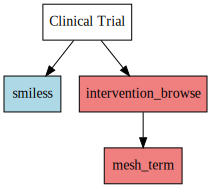

Clinical Trial/arm_group/arm_group_type 2
Clinical Trial/brief_summary/textblock 3
Clinical Trial/brief_title 4
Clinical Trial/condition 5
Clinical Trial/condition_browse/mesh_term 6
Clinical Trial/eligibility/criteria/textblock 7
Clinical Trial/eligibility/gender 8
Clinical Trial/eligibility/healthy_volunteers 8
Clinical Trial/eligibility/maximum_age 8
Clinical Trial/eligibility/minimum_age 8
Clinical Trial/eligibility/sampling_method 8
Clinical Trial/eligibility/study_pop/textblock 8
Clinical Trial/enrollment 8
Clinical Trial/has_expanded_access 9
Clinical Trial/icdcode 10
Clinical Trial/intervention/description 11
Clinical Trial/intervention/intervention_name 12
Clinical Trial/intervention/intervention_type 12
Clinical Trial/intervention_browse/mesh_term 12
Clinical Trial/keyword 12
Clinical Trial/location/facility/address/city 13
Clinical Trial/number_of_arms 14
Clinical Trial/oversight_info/has_dmc 15
Clinical Trial/oversight_info/is_fda_regulated_device 16
Clinical Trial/oversigh

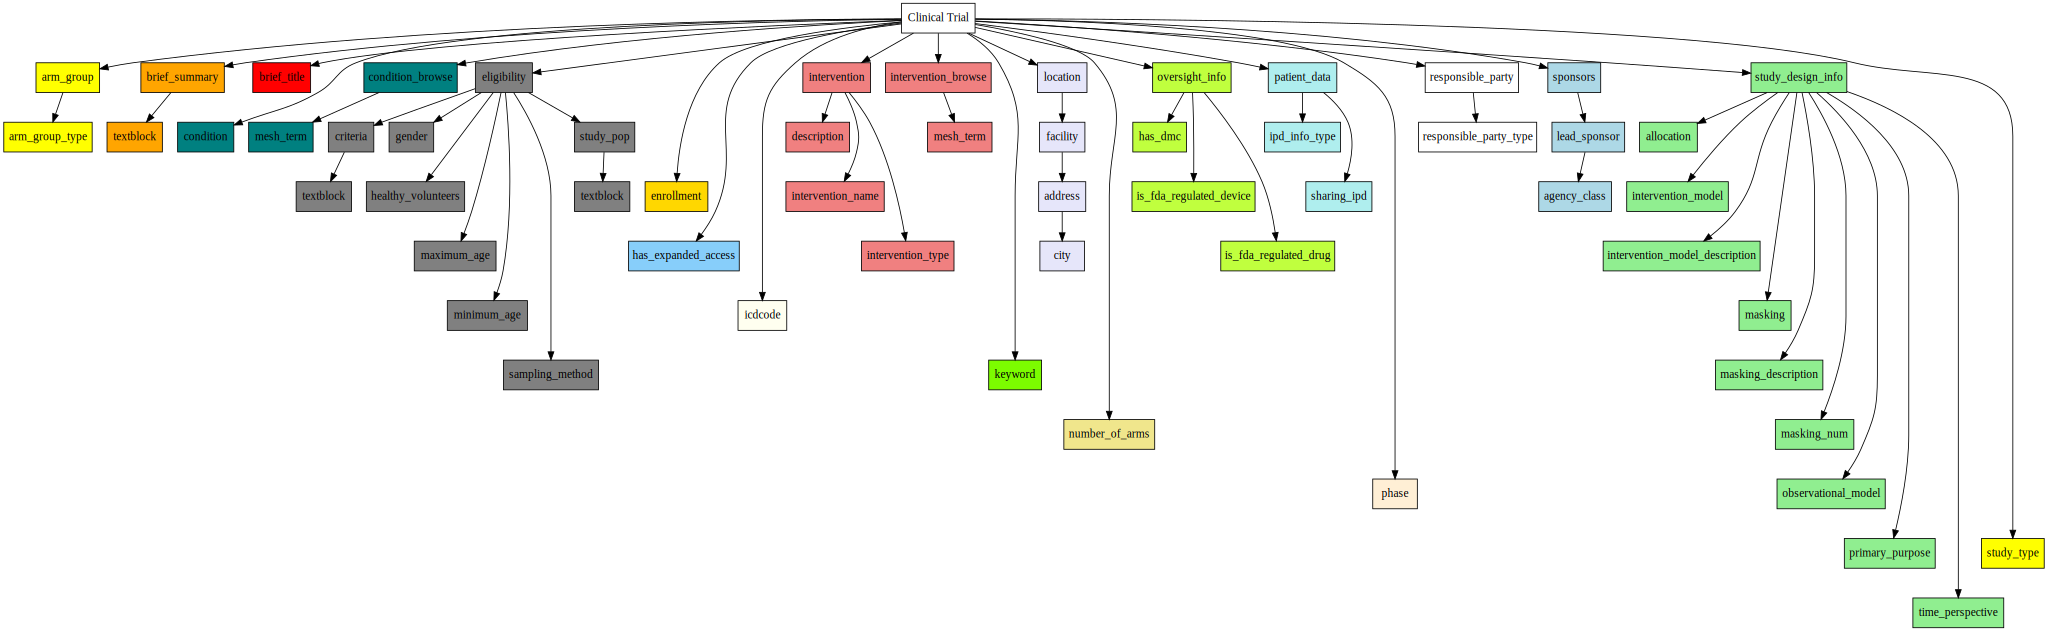

Clinical Trial/arm_group/arm_group_type 22
Clinical Trial/biospec_retention 22
Clinical Trial/brief_summary/textblock 23
Clinical Trial/brief_title 23
Clinical Trial/condition 23
Clinical Trial/condition_browse/mesh_term 23
Clinical Trial/eligibility/criteria/textblock 23
Clinical Trial/eligibility/gender 23
Clinical Trial/eligibility/healthy_volunteers 23
Clinical Trial/eligibility/maximum_age 23
Clinical Trial/eligibility/minimum_age 23
Clinical Trial/eligibility/sampling_method 23
Clinical Trial/enrollment 23
Clinical Trial/has_expanded_access 23
Clinical Trial/icdcode 23
Clinical Trial/intervention/description 23
Clinical Trial/intervention/intervention_name 23
Clinical Trial/intervention/intervention_type 23
Clinical Trial/intervention_browse/mesh_term 23
Clinical Trial/keyword 23
Clinical Trial/location/facility/address/city 23
Clinical Trial/number_of_arms 23
Clinical Trial/oversight_info/has_dmc 23
Clinical Trial/oversight_info/is_fda_regulated_device 23
Clinical Trial/oversigh

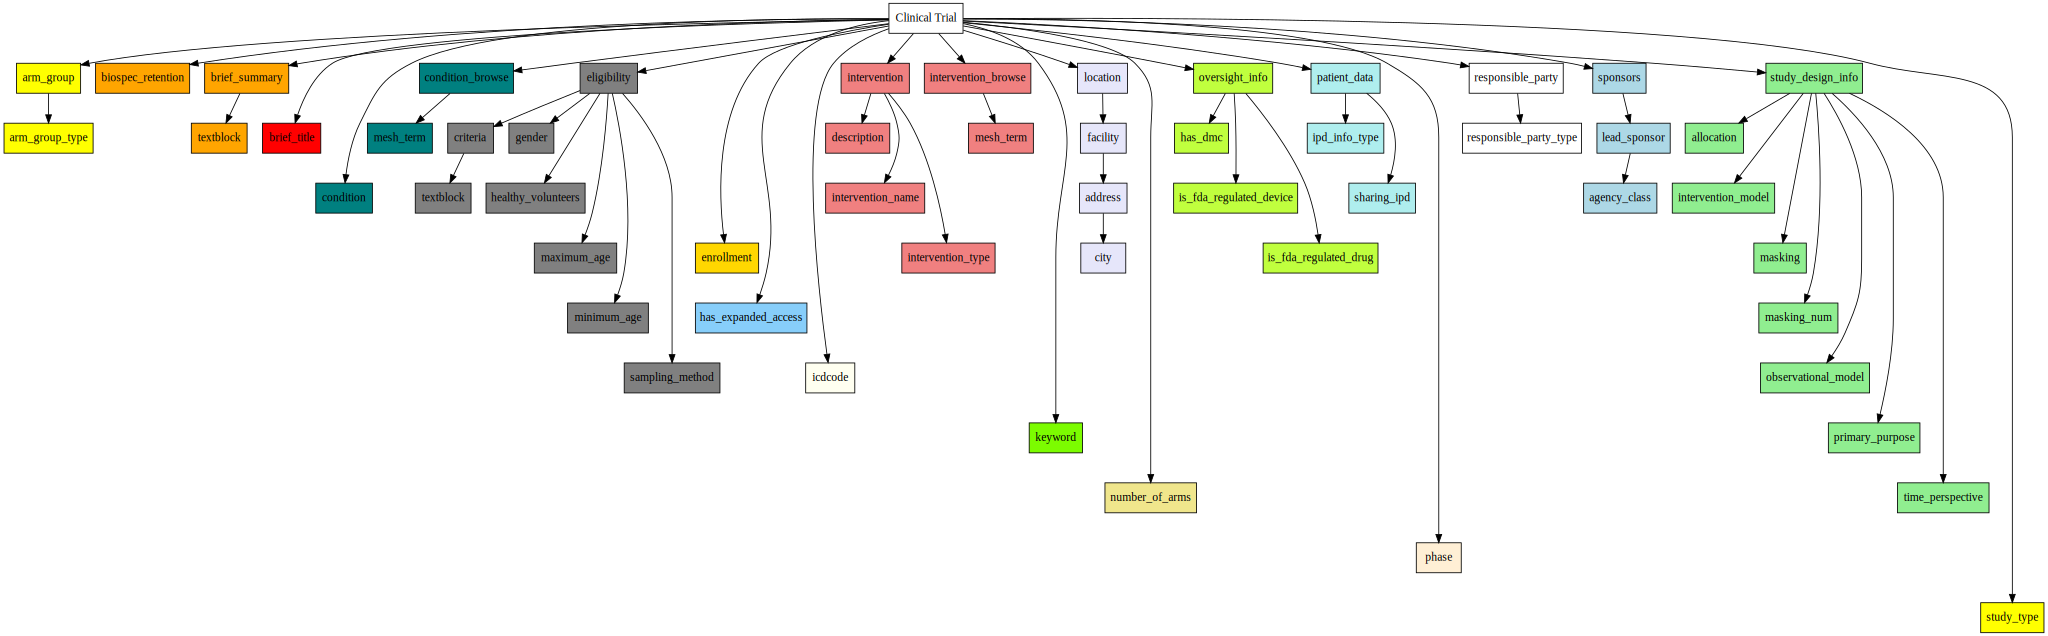

Clinical Trial/biospec_descr/textblock 23
Clinical Trial/brief_summary/textblock 24
Clinical Trial/brief_title 24
Clinical Trial/condition 24
Clinical Trial/condition_browse/mesh_term 24
Clinical Trial/detailed_description/textblock 24
Clinical Trial/eligibility/gender_description 25
Clinical Trial/eligibility/sampling_method 25
Clinical Trial/eligibility/study_pop/textblock 25
Clinical Trial/icdcode 25
Clinical Trial/intervention/intervention_name 25
Clinical Trial/intervention/intervention_type 25
Clinical Trial/intervention_browse/mesh_term 25
Clinical Trial/keyword 25
Clinical Trial/number_of_arms 25
Clinical Trial/oversight_info/has_dmc 25
Clinical Trial/oversight_info/is_fda_regulated_device 25
Clinical Trial/oversight_info/is_fda_regulated_drug 25
Clinical Trial/phase 25
Clinical Trial/study_design_info/allocation 25
Clinical Trial/study_design_info/intervention_model 25
Clinical Trial/study_design_info/intervention_model_description 25
Clinical Trial/study_design_info/masking 2

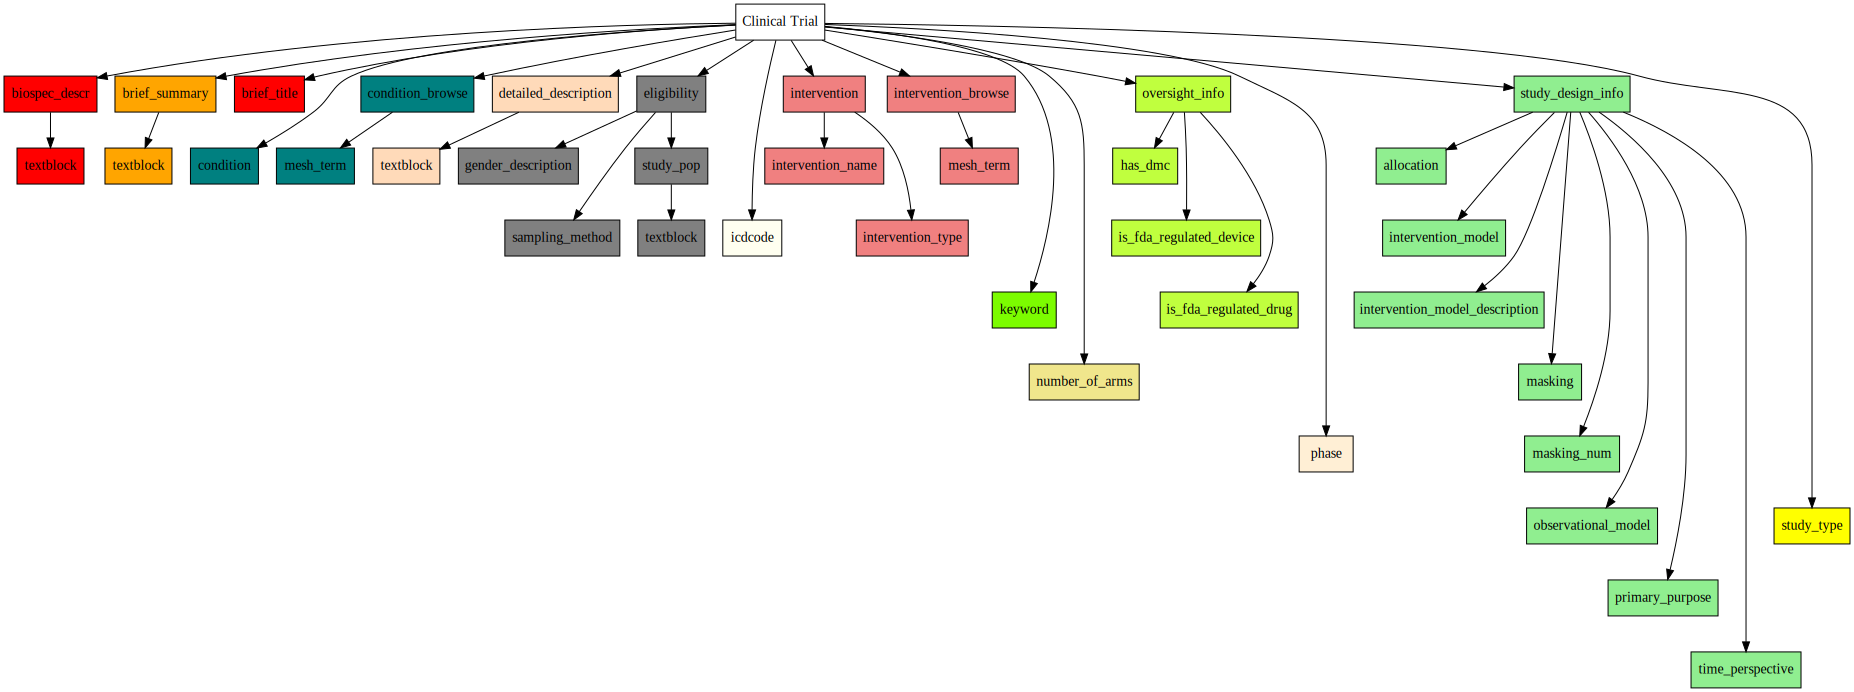

Clinical Trial/arm_group/arm_group_type 25
Clinical Trial/brief_summary/textblock 25
Clinical Trial/brief_title 25
Clinical Trial/condition 25
Clinical Trial/condition_browse/mesh_term 25
Clinical Trial/eligibility/criteria/textblock 25
Clinical Trial/eligibility/gender 25
Clinical Trial/eligibility/healthy_volunteers 25
Clinical Trial/eligibility/maximum_age 25
Clinical Trial/eligibility/minimum_age 25
Clinical Trial/eligibility/sampling_method 25
Clinical Trial/eligibility/study_pop/textblock 25
Clinical Trial/enrollment 25
Clinical Trial/has_expanded_access 25
Clinical Trial/icdcode 25
Clinical Trial/intervention/description 25
Clinical Trial/intervention/intervention_name 25
Clinical Trial/intervention/intervention_type 25
Clinical Trial/intervention_browse/mesh_term 25
Clinical Trial/keyword 25
Clinical Trial/location/facility/address/city 25
Clinical Trial/number_of_arms 25
Clinical Trial/oversight_info/has_dmc 25
Clinical Trial/oversight_info/is_fda_regulated_device 25
Clinical 

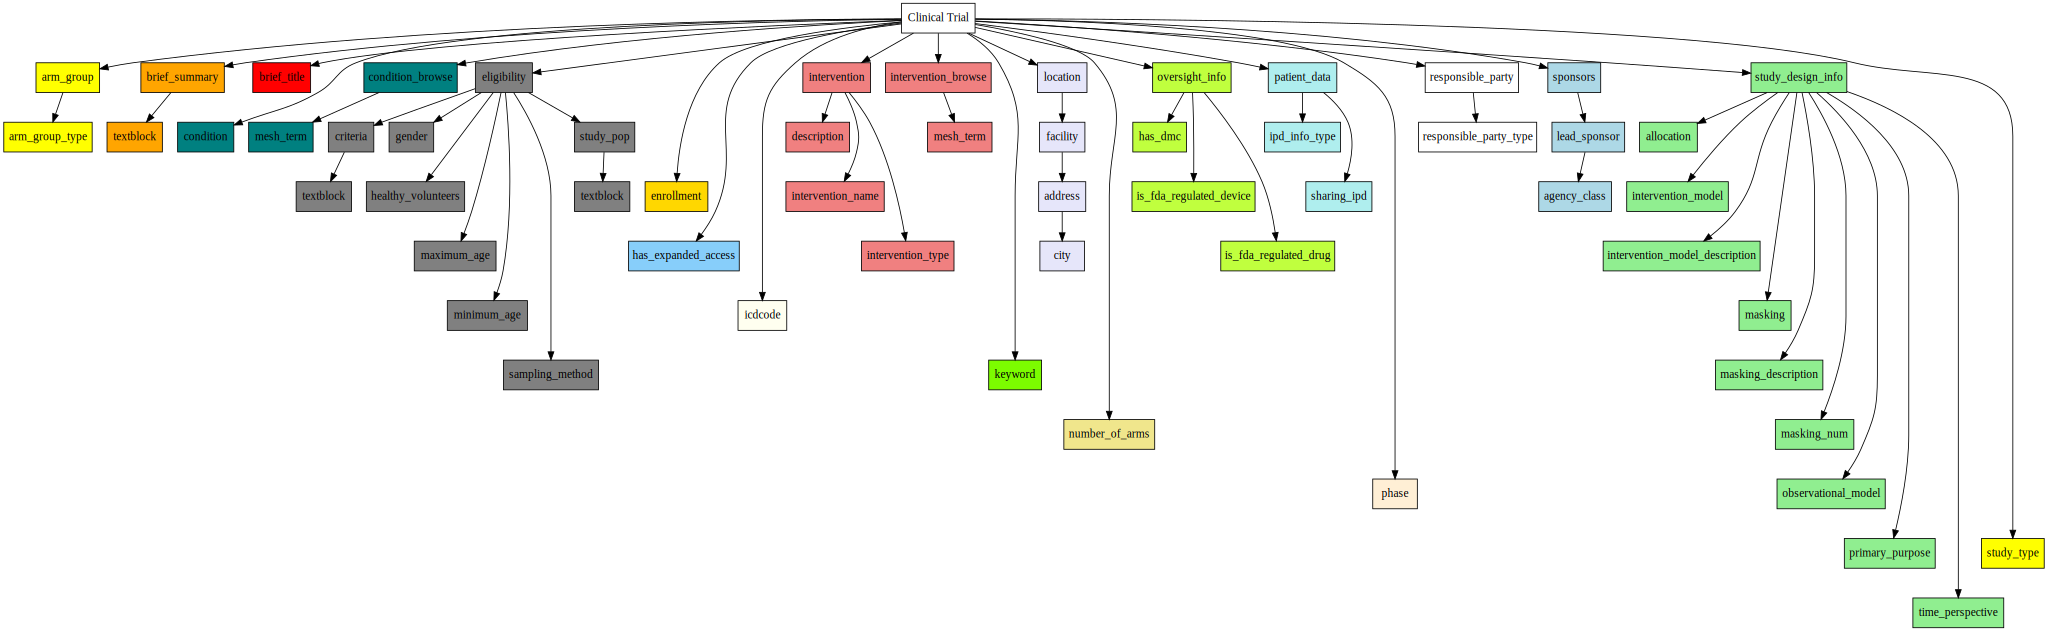

Clinical Trial/arm_group/arm_group_type 25
Clinical Trial/biospec_retention 25
Clinical Trial/brief_summary/textblock 25
Clinical Trial/brief_title 25
Clinical Trial/condition 25
Clinical Trial/condition_browse/mesh_term 25
Clinical Trial/eligibility/criteria/textblock 25
Clinical Trial/eligibility/gender 25
Clinical Trial/eligibility/healthy_volunteers 25
Clinical Trial/eligibility/maximum_age 25
Clinical Trial/eligibility/minimum_age 25
Clinical Trial/eligibility/sampling_method 25
Clinical Trial/eligibility/study_pop/textblock 25
Clinical Trial/has_expanded_access 25
Clinical Trial/icdcode 25
Clinical Trial/intervention/description 25
Clinical Trial/intervention/intervention_name 25
Clinical Trial/intervention/intervention_type 25
Clinical Trial/intervention_browse/mesh_term 25
Clinical Trial/keyword 25
Clinical Trial/location/facility/address/city 25
Clinical Trial/number_of_arms 25
Clinical Trial/phase 25
Clinical Trial/responsible_party/responsible_party_type 25
Clinical Trial/sp

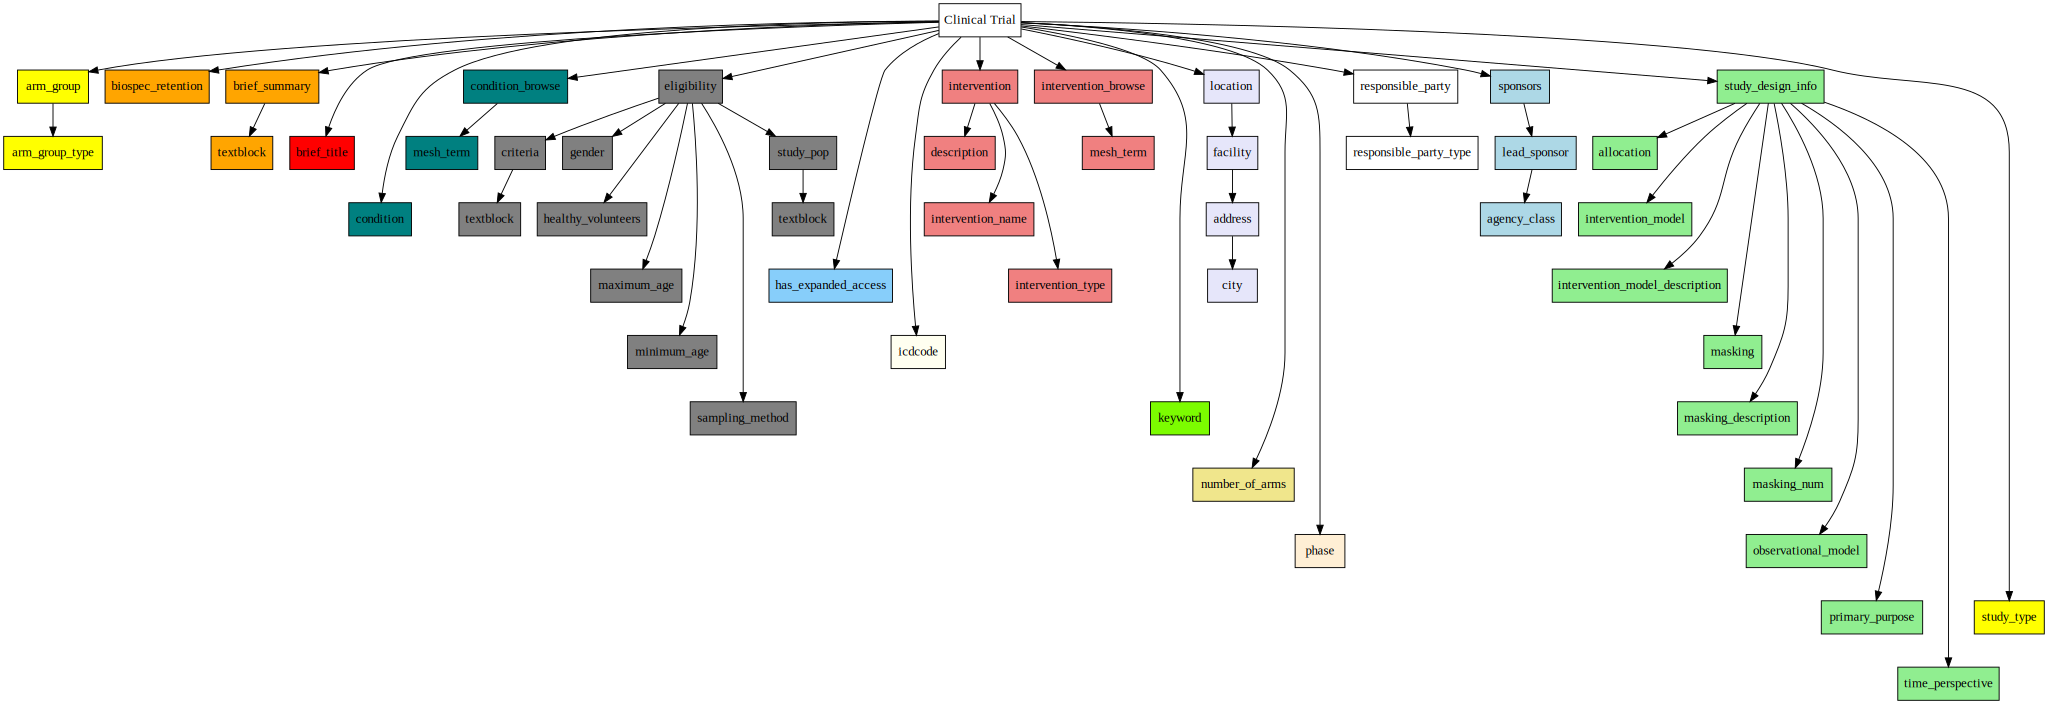

Clinical Trial/arm_group/arm_group_type 25
Clinical Trial/brief_summary/textblock 25
Clinical Trial/brief_title 25
Clinical Trial/condition 25
Clinical Trial/condition_browse/mesh_term 25
Clinical Trial/eligibility/criteria/textblock 25
Clinical Trial/eligibility/gender 25
Clinical Trial/eligibility/healthy_volunteers 25
Clinical Trial/eligibility/maximum_age 25
Clinical Trial/eligibility/minimum_age 25
Clinical Trial/eligibility/sampling_method 25
Clinical Trial/eligibility/study_pop/textblock 25
Clinical Trial/enrollment 25
Clinical Trial/has_expanded_access 25
Clinical Trial/icdcode 25
Clinical Trial/intervention/description 25
Clinical Trial/intervention/intervention_name 25
Clinical Trial/intervention/intervention_type 25
Clinical Trial/intervention_browse/mesh_term 25
Clinical Trial/keyword 25
Clinical Trial/location/facility/address/city 25
Clinical Trial/number_of_arms 25
Clinical Trial/oversight_info/has_dmc 25
Clinical Trial/oversight_info/is_fda_regulated_device 25
Clinical 

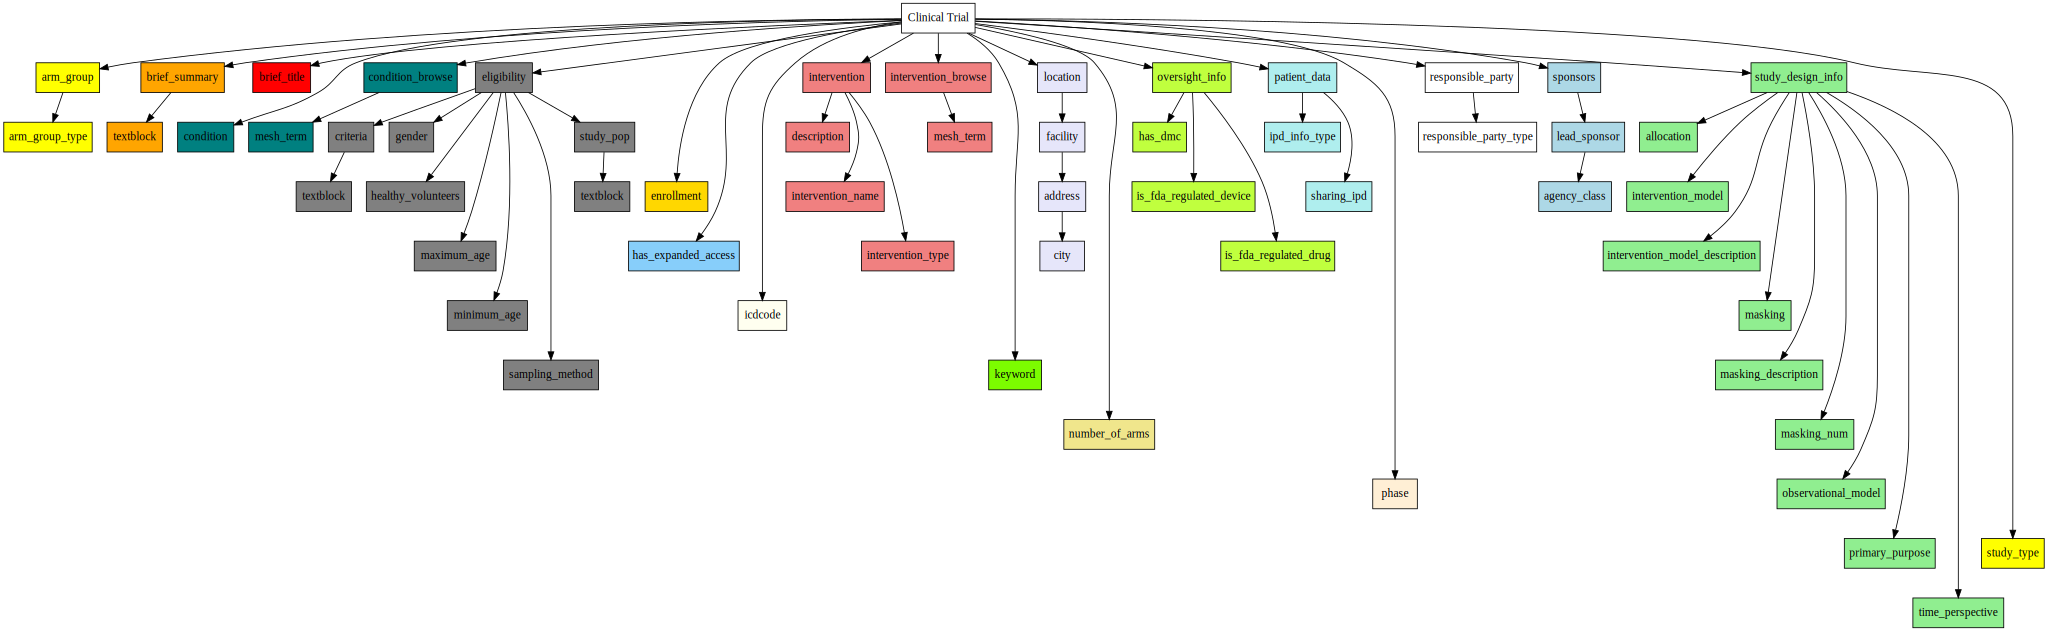

Clinical Trial/biospec_descr/textblock 25
Clinical Trial/brief_summary/textblock 25
Clinical Trial/brief_title 25
Clinical Trial/condition 25
Clinical Trial/condition_browse/mesh_term 25
Clinical Trial/detailed_description/textblock 25
Clinical Trial/eligibility/criteria/textblock 25
Clinical Trial/eligibility/gender_description 25
Clinical Trial/eligibility/healthy_volunteers 25
Clinical Trial/eligibility/maximum_age 25
Clinical Trial/eligibility/minimum_age 25
Clinical Trial/eligibility/sampling_method 25
Clinical Trial/eligibility/study_pop/textblock 25
Clinical Trial/icdcode 25
Clinical Trial/intervention/intervention_name 25
Clinical Trial/intervention/intervention_type 25
Clinical Trial/intervention_browse/mesh_term 25
Clinical Trial/keyword 25
Clinical Trial/number_of_arms 25
Clinical Trial/oversight_info/has_dmc 25
Clinical Trial/oversight_info/is_fda_regulated_device 25
Clinical Trial/oversight_info/is_fda_regulated_drug 25
Clinical Trial/phase 25
Clinical Trial/study_design_i

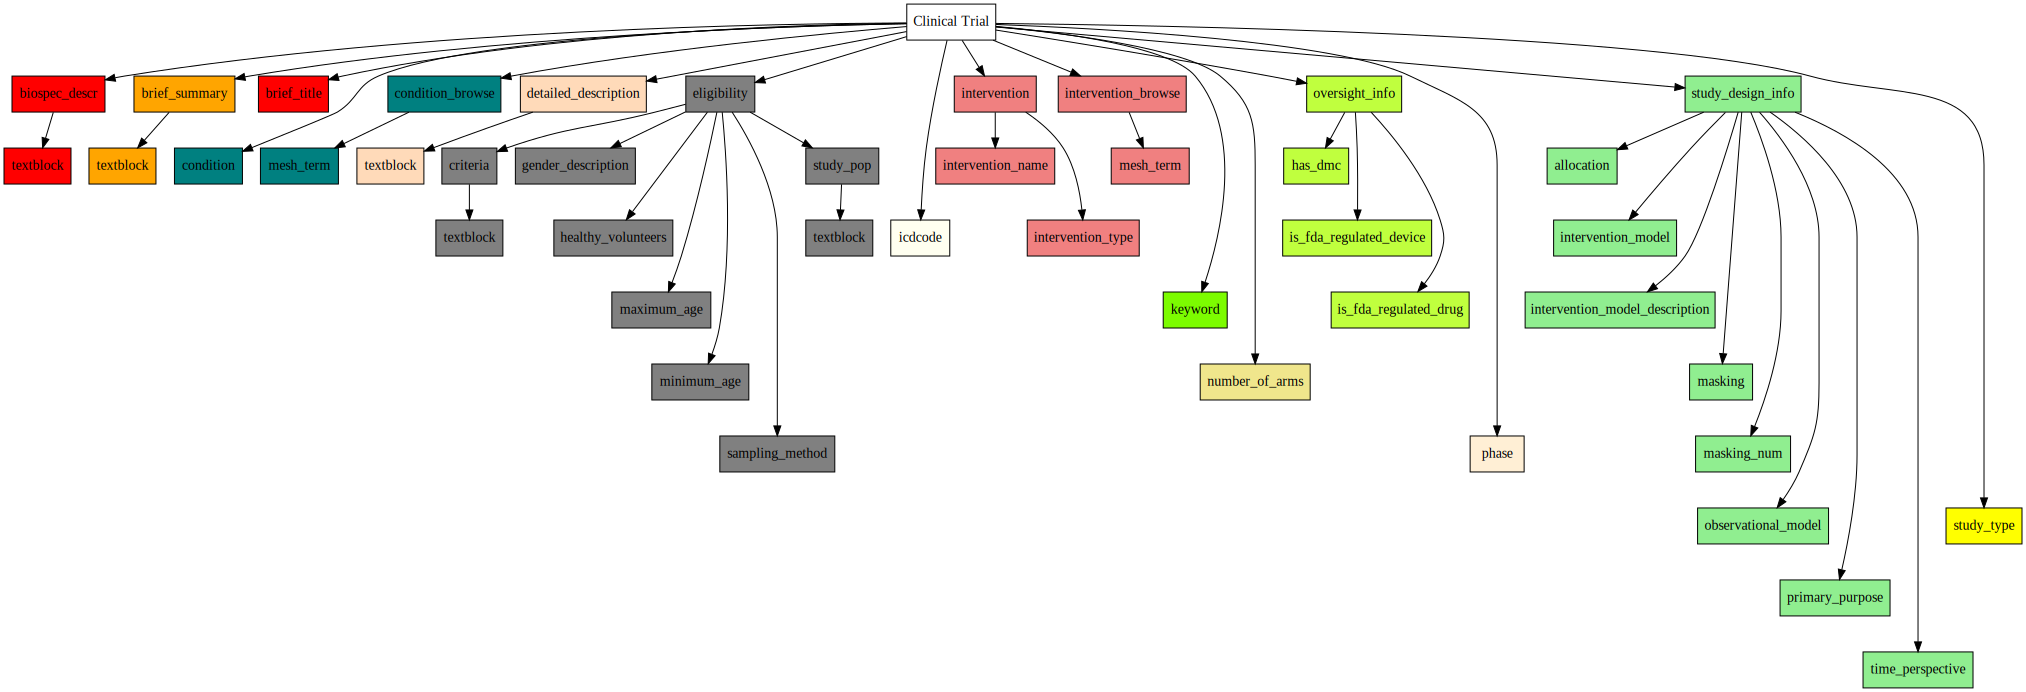

In [ ]:
tasks = [task for task in os.listdir('preview-set') if 'input' in task]
# tasks = ['serious_adverse_rate_input.csv']
created_nodes = {}
for task in tasks:
    df = pd.read_csv(f'preview-set/{task}', index_col=0)
    feature_names = [c for c in df.columns if (' ' not in c) and '-' not in c]
    dot = Digraph(comment='Feature Hierarchy')
    # dot.attr(rankdir='LR')
    # dot.attr('node', shape='box', style='filled', width=2)
    edges = []
    # feature_names = sorted(feature_info['feature_name'].to_list())
    for name in feature_names:
        name = 'Clinical Trial/' + name 
        print(name, len(created_nodes))
        if 'textblock' in name:
            name = name.replace('\textblock', '')
        create_hierarchy_graph(dot, edges, name, created_nodes)

    dot = dot.unflatten(stagger=20)
    dot.render(f'feature_fig/{task[:-9]}', format='pdf', cleanup=True)
    display(dot)